# COGS 108 - Final Project (The Relationship Between a Country's Corruption Levels and COVID-19 Rates)


## Link to Video


https://drive.google.com/file/d/1TqALfR1Jf-iJb79ZSRviMVHEqoBOL8GF/view?usp=sharing

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Overview

This project looks at the relationship between corruption rates (based on Corruption Perception Index from 2020 and 2021) and data on COVID-19 case rate. While it primarily looks at the infection rate, we also analyzed the data on vaccination rates, availability of handwashing stations, and availability of hospital beds as they might also indicate a relationship with a country's corruption rate.

# Names

- Rhea Bhutada
- Reyner Santonius
- Anna Liu
- Lauren Tran
- Irisa Jin

<a id='research_question'></a>
# Research Question

Is there a relationship between a country’s corruption level (measured by the Corruption Perception Index (CPI)) and its COVID-19 infection rate? What other COVID-19 related factors have a relationship with a country's corruption level? Are there any countries that have good infection rates and high corruption levels? Similarly, are there any countries that have bad infection rates and low corruption levels? Does the corruption level stay the same or vary between 2020 and 2021?

<a id='background'></a>

## Background & Prior Work

Throughout the course of the COVID-19 pandemic, the honorability of political institutions has been put into question. Especially during times of uncertainty and crisis, constituents of a country rely on their government to enact policies that secure their well-being. From distributing aid to providing resources, political institutions must promptly manage their available funds in a systematic and reasonable manner. To what extent have countries done this?

A recent research analysis done by *Transparency International* highlights the need to assess the Corruption Perception Indices (CPIs) of each country during the COVID-19 pandemic. Their research suggests that a country’s corruption levels correlate with the extent of that country’s health coverage and funds allocated for obtaining healthcare materials. As a result, their research suggests that factors such as “government spending, strengthening oversight institutions, and protecting civic space” can allow countries to be better prepared when dealing with a global crisis like the COVID-19 pandemic [1]. Similarly, another study published by *Scientific Reports* showcases that corruption rates have negatively impacted the progress of COVID-19 vaccinations. Their analysis suggests that “an interquartile increase in the corruption index reduces the share of the vaccinated population by approximately 15 percentage points” [2]. As a result, the negative correlation between corruption levels and vaccination rates for each country is highly significant. 

Overall, while some countries were better prepared to handle this crisis than others, research shows that the risk of corruption remains high for every country during this global pandemic. As suggested by prior research, the corruption levels are a good indicator of unreasonable policies and government mismanagement in response to the pandemic. However, it remains to be answered whether the levels of corruption have actually worsened the rate of COVID-19 in each country.

References (include links):
- 1) https://www.transparency.org/en/news/cpi-2020-research-analysis-why-fighting-corruption-matters-in-times-of-covid-19 
        - Statement: "government spending, strengthening oversight institutions, and protecting civic space"

- 2) https://www.nature.com/articles/s41598-021-02802-1
        - Statement: "an interquartile increase in the corruption index reduces the share of the vaccinated population by approximately 15 percentage points"

# Hypothesis


We hypothesize that there will be a negative correlation between the corruption levels of different countries and their COVID-19 infection rates. We also hypothesize that there will be a positive correlation between a country's correuption level and its vaccination rates or resource availability. Although inherently the corruption level of each country depends on the efficacy of the political system that country has in place, we predict that the crisis brought on by the global pandemic has deepened corruption levels for most countries, in turn raising COVID-19 infection rates. Based on historical and recent events, this prediction seems plausible as the inherent corruption of countries seems to worsen when countries are vulnerable and unprepared, which only seems to worsen the crisis itself. 

# Dataset(s)

- Dataset Name: Corruption Perception Indices
- Link to the dataset: https://en.wikipedia.org/wiki/Corruption_Perceptions_Index
- Number of observations: 180

This is a data set measures the Corruptions Perceptions Index for 180 countries, and contains data ranging from 2012 to 2021 for each country. However, we will only be using data from the past five years from 2017 to 2021

- Dataset Name: Coronavirus (COVID-19) Cases
- Link to the dataset: https://ourworldindata.org/covid-cases
- Number of observations: 159554

This dataset includes information on COVID-19 cases by year and location. The information includes the number of total cases, new cases, total deaths, new deaths, population, total vaccinations, handwashing facilities, hospital beds of that particular location. 

We will combining the Corruptions Perceptions Index dataset with our Coronavirus (COVID-19) Cases datasets to track if there is any correlation between COVID-19 and the Corruptions Perceptions Index. However, we will only merge our 2020 and 2021 columns in each data set as there is not enough data of COVID-19 cases prior to 2020 to look for trends.

# Setup

In this section, we imported a number of packages in order to read, edit, visualize, model, and analyze our data.

In [1]:
# import pandas & numpy library
import pandas as pd
import numpy as np

# import seaborn and apply its plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (12, 5)

# packages helpful for webscraping
import requests
import bs4
from bs4 import BeautifulSoup

#improve resolution
%config InlineBackend.figure_format ='retina'

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Data Cleaning

## CPI Dataset

To begin our data cleaning process, we began to parse through the data available on corruption perception indices (CPIs). CPIs are a widely-used indicator of corruption on a global scale. The measurement itself is determined by experts and businesses. These individuals and entities participate in a series of surveys and assessments that ultimately determine the overall corruption level of a country. While the CPI is determined by a number of factors, the CPI does not include in its calculation certain forms of corruption including money laundering, tax fraud, illicit reports, incidents in the private sector, and informal markets. The most reliable and updated data on CPIs we found is collected by *Transparency International*. We planned on collecting data for the past five years (2017-2021) to determine how the CPIs have differed per country. Instead of scraping data for each year on *Transparency International*, we were able to find a more consolidated table for each year on *Wikepedia*. We made sure that the data provided on *Wikepedia* matched the data provided for each years corruption rates on *Transparency International*. The following steps were taken to scrape the data from the *Wikepedia* page on CPIs.

*Note: Much of the code seen in the next few blocks was based on Discussion Lab 4 since the data was also scraped from Wikepedia.*

In [2]:
# specify webpage we want to scrape 
wiki = 'https://en.wikipedia.org/wiki/Corruption_Perceptions_Index'
req = requests.get(wiki)
soup = BeautifulSoup(req.content, 'html') # get contents of web page

In [3]:
wikitables = soup.findAll("table", 'wikitable') # get tables
# extract the first table with CPIs
tbl = wikitables[1]

In [4]:
cpi_tbl = pd.DataFrame(columns=range(0,31), index = range(0,200)) # I know the size 

In [5]:
# get the column names for the CPI table
ind=0
cols_list = []
for header in tbl.find_all('tr'): # specify HTML tags
    header_name = header.find_all('th') # tag containing column names
    for head in header_name:
        cols_list.append(head.get_text()) # get the text from between the tags
cpi_tbl.columns = [s.replace('\n','') for s in cols_list] # get rid of new line characters in column names

In [6]:
# fill in the contents
row_marker = -1
for row in tbl.find_all('tr'):
    column_marker = 0
    columns = row.find_all('td') # different tag than above for table contents
    for column in columns:
        cpi_tbl.iat[row_marker,column_marker] = column.get_text()
        column_marker += 1
    row_marker += 1

In [7]:
# renaming the columns we are using
# includes CPIs from 2021 to 2017
new_columns = ['rank','location','2021 score', '2021 change', '2020 score', '2020 change',
               '2019 score', '2019 change', '2018 score', '2018 change','2017 score', '2017 change',
               'extra', 'extra','extra', 'extra','extra', 'extra', 'extra', 'extra', 'extra', 
               'extra', 'extra', 'extra','extra','extra','extra','extra','extra','extra','extra',]
columns_dict = dict(zip(cpi_tbl.columns, new_columns))
cpi_tbl.columns = new_columns

In [8]:
# dropping any rows where all variables have missing data
cpi_tbl = cpi_tbl.dropna(how="all")

# dropping any columns that are extra and unecessary for our data analysis
cpi_tbl = cpi_tbl.iloc[:, :12]
cpi_tbl = cpi_tbl[['rank','location','2021 score','2020 score',
               '2019 score', '2018 score', '2017 score']]

In [9]:
# function to convert scores into int type
def standardize_score(str_in):
    str_in = str_in.strip()
    try:
        output = int(str_in)
    except:
        output = np.nan
    return output

# apply the function
cpi_tbl['2021 score'] = cpi_tbl['2021 score'].apply(standardize_score)
cpi_tbl['2020 score'] = cpi_tbl['2020 score'].apply(standardize_score)
cpi_tbl['2019 score'] = cpi_tbl['2019 score'].apply(standardize_score)
cpi_tbl['2018 score'] = cpi_tbl['2018 score'].apply(standardize_score)
cpi_tbl['2017 score'] = cpi_tbl['2017 score'].apply(standardize_score)

In [10]:
# standardize the location string
def standardize_location(str_in):  
    try:
        str_in = str_in.strip()

        if '\xa0' in str_in or '\xa0\xa0' in str_in:
            str_in = str_in.replace('\xa0', '')
            str_in = str_in.replace('\xa0\xa0', '')
    except:
        str_in = ''
        
    return str_in

# apply the function
cpi_tbl['location'] = cpi_tbl['location'].apply(standardize_location)

In [11]:
# here is a look at our cleaned dataset
cpi_tbl

,rank,location,2021 score,2020 score,2019 score,2018 score,2017 score
1,1,Denmark,88.0,88,87,88,88
2,1,New Zealand,88.0,88,87,87,89
3,1,Finland,88.0,85,86,85,85
4,4,Singapore,85.0,85,85,85,84
5,4,Sweden,85.0,85,85,85,84
...,...,...,...,...,...,...,...
176,174,Yemen,16.0,15,15,14,16
177,177,Venezuela,14.0,15,16,18,18
178,178,Somalia,13.0,12,9,10,9
179,178,Syria,13.0,14,13,13,14


## COVID-19 Infection Rate Datasets

After cleaning our data on CPIs, we set out to make a clean datasets that captured factors that influence the COVID-19 Infection Rate. This included looking at the total number of cases, total number of deaths, population, total vaccinations per population, number of average number of handwashing facilities, and average number of hospital beds in a given year. We found a csv file from *Our World in Data* that had reliable information and data on all these values. The only issue was that data was provided on a day to day basis, when we want data on the entire year. Therefore, much of the data cleaning for this section relied on grouping information in the provided csv file together. Additionally, information for vaccinations was not available in 2020 for many countries, so we were forced to look at mainly 2021 data. Moreover, data on handwashing facilities and hospital beds were not available for certain countries so we looked into making separate dataframes for these. We began by first making a clean dataframe that captured information on COVID-19 cases in 2020 and 2021. 

In [12]:
# loading in our data from our world in data
#covid_tbl = pd.read_csv('/Users/rheab/Downloads/owid-covid-data.csv')
covid_tbl = pd.read_csv('owid-covid-data.csv')
#covid_tbl = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

In [13]:
# including the necessary columns for our COVID-19 cases dataset
cases_tbl = covid_tbl[['iso_code','location','date', 'total_cases', 'new_cases',
                   'total_deaths', 'new_deaths', 'total_cases_per_million', 'total_deaths_per_million', 
                   'population']]

# dropping any rows that have any missing data
cases_tbl = cases_tbl.dropna(how="any").reset_index()

In [14]:
# changing the date to have only information on the year
cases_tbl['date'] = cases_tbl['date'].str.split('-').str[0].astype(np.int64)

# only included 2020 and 2021 information
cases_tbl = cases_tbl.query('date==2020 | date==2021')

In [15]:
# make separate dataframes
# one has the mean population of the year, another has the average new cases, a third has the average new deaths
# the rest of the variables are calculated by using the maximum
pop_df = cases_tbl.groupby(["location", "date"]).mean()[["population"]]
new_cases_df = cases_tbl.groupby(["location", "date"]).mean()[["new_cases"]]
new_deaths_df = cases_tbl.groupby(["location", "date"]).mean()[["new_deaths"]]
max_df = cases_tbl.groupby(["location", "date"]).max().drop(columns=["new_cases", 
                                                                     "new_deaths",
                                                                     "population"])

In [16]:
# combining the datasets into one
confirmed_cases_tbl = max_df.join(new_cases_df)
confirmed_cases_tbl = confirmed_cases_tbl.join(new_deaths_df)
confirmed_cases_tbl = confirmed_cases_tbl.join(pop_df)

# reset index and sort values by total cases per million
confirmed_cases_tbl = confirmed_cases_tbl.reset_index()

In [17]:
# take a look at the final data set on confirmed covid-19 cases in 2020
confirmed_cases_tbl

,location,date,index,iso_code,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,new_cases,new_deaths,population
0,Afghanistan,2020,311,AFG,52330.0,2189.0,1313.655,54.951,184.140845,7.707746,3.983543e+07
1,Afghanistan,2021,676,AFG,158084.0,7356.0,3968.427,184.660,289.736986,14.156164,3.983543e+07
2,Africa,2020,1035,OWID_AFR,2760454.0,65468.0,2009.815,47.666,9232.143813,218.956522,1.373486e+09
3,Africa,2021,1400,OWID_AFR,9756168.0,228453.0,7103.214,166.331,19115.419178,446.534247,1.373486e+09
4,Albania,2020,1747,ALB,58316.0,1181.0,20298.413,411.078,196.979730,3.989865,2.872934e+06
...,...,...,...,...,...,...,...,...,...,...,...
408,Yemen,2021,158366,YEM,10126.0,1984.0,332.102,65.069,21.991781,3.764384,3.049064e+07
409,Zambia,2020,158691,ZMB,20725.0,388.0,1095.364,20.507,75.507299,1.416058,1.892066e+07
410,Zambia,2021,159056,ZMB,254274.0,3734.0,13438.963,197.350,639.860274,9.167123,1.892066e+07
411,Zimbabwe,2020,159379,ZWE,13867.0,363.0,918.821,24.052,48.816901,1.278169,1.509217e+07


In addition, since data on vaccinations is not readily available for many countries in 2020, we were only able to find  consistent information for total vaccinations in 2021. Our process of getting COVID_19 vaccination data for 2021 can be seen in the following code. 

In [19]:
# including the necessary columns for our COVID-19 vaccination dataset
vaccine_df = covid_tbl[['location','date', 'total_vaccinations_per_hundred']]

# changing the date to have only information on 2021
vaccine_df['date'] = vaccine_df['date'].str.split('-').str[0].astype(np.int64)

In [20]:
# only included 2021 vaccine information
vaccine_df = vaccine_df.query('date==2021')

# dropped any rows with missing data
vaccine_df = vaccine_df.dropna(how="any")

# took the total number of vaccines per hundred for each country in 2021 and sorted it
total_vaccine_df = vaccine_df.groupby(["location"]).max()[["total_vaccinations_per_hundred"]]
total_vaccine_df = total_vaccine_df.sort_values(by='total_vaccinations_per_hundred', ascending = False)
total_vaccine_df = total_vaccine_df.reset_index()

# take a look at our data set for vaccinations
total_vaccine_df

,location,total_vaccinations_per_hundred
0,Gibraltar,321.52
1,Cuba,272.80
2,Chile,230.65
3,United Arab Emirates,224.27
4,Singapore,214.16
...,...,...
226,Yemen,1.79
227,Haiti,1.71
228,Chad,1.69
229,Democratic Republic of Congo,0.36


Furthermore, data on handwashing facilities and hospital beds were only available for certain countries, which is the reason we decided to make a separate dataframe for this information. The following is our data cleaning procedure for getting the average number of handwashing facilities and hospital beds for 2020 and 2021.

In [21]:
# including the necessary columns for our COVID-19 resources dataset
resources_df = covid_tbl[['location','date', 'handwashing_facilities', 'hospital_beds_per_thousand']]

# changing the date to have only information on the year
resources_df['date'] = resources_df['date'].str.split('-').str[0].astype(np.int64)

In [22]:
# only included 2020 and 2021 information
resources_df = resources_df.query('date==2020 | date==2021')

# dropped any rows with missing data
resources_df = resources_df.dropna(how="any")

# make separate dataframes
handwashing_df = resources_df.groupby(["location", "date"]).max()[["handwashing_facilities"]]
beds_df = resources_df.groupby(["location", "date"]).max()[["hospital_beds_per_thousand"]]

# combine dataframes into one
other_df = resources_df.groupby(["location", "date"]).max().drop(columns=["handwashing_facilities", "hospital_beds_per_thousand"])
resources_df = other_df.join(handwashing_df)
resources_df = resources_df.join(beds_df)

# reset the index and sorted the values
resources_df = resources_df.reset_index()

# take a look at COVID-19 resources data
resources_df

,location,date,handwashing_facilities,hospital_beds_per_thousand
0,Afghanistan,2020,37.746,0.5
1,Afghanistan,2021,37.746,0.5
2,Algeria,2020,83.741,1.9
3,Algeria,2021,83.741,1.9
4,Armenia,2020,94.043,4.2
...,...,...,...,...
156,Yemen,2021,49.542,0.7
157,Zambia,2020,13.938,2.0
158,Zambia,2021,13.938,2.0
159,Zimbabwe,2020,36.791,1.7


# Data Analysis & Results

The following sections are where we carry out EDA on our datasets.

### Corruption Rates (based on CPIs) from 2017-2021

In this section, we hope to see the overall trend of corruption rates from 2017-2021. When looking at a countries level of corruption, the lower the CPI number, the more corrupt the country. Similarly, the higher the CPI number the less corrupt the country. To do so we will create a line plot that shows the trend of corruption rates for the past five years for each country. To do so, we first melt our datasets and created a graph with a number of line plots for each country.

In [23]:
# reducing the rows in each dataset to only include the locations that are similar
cpi_tbl = cpi_tbl[cpi_tbl['location'].isin(list(confirmed_cases_tbl['location']))]
confirmed_cases_tbl = confirmed_cases_tbl[confirmed_cases_tbl['location'].isin(list(cpi_tbl['location']))]
total_vaccine_df = total_vaccine_df[total_vaccine_df['location'].isin(list(cpi_tbl['location']))]
resources_df =resources_df[resources_df['location'].isin(list(cpi_tbl['location']))]

Text(0.5, 1.0, 'Trend of Corruption Rates from 2017-2021')

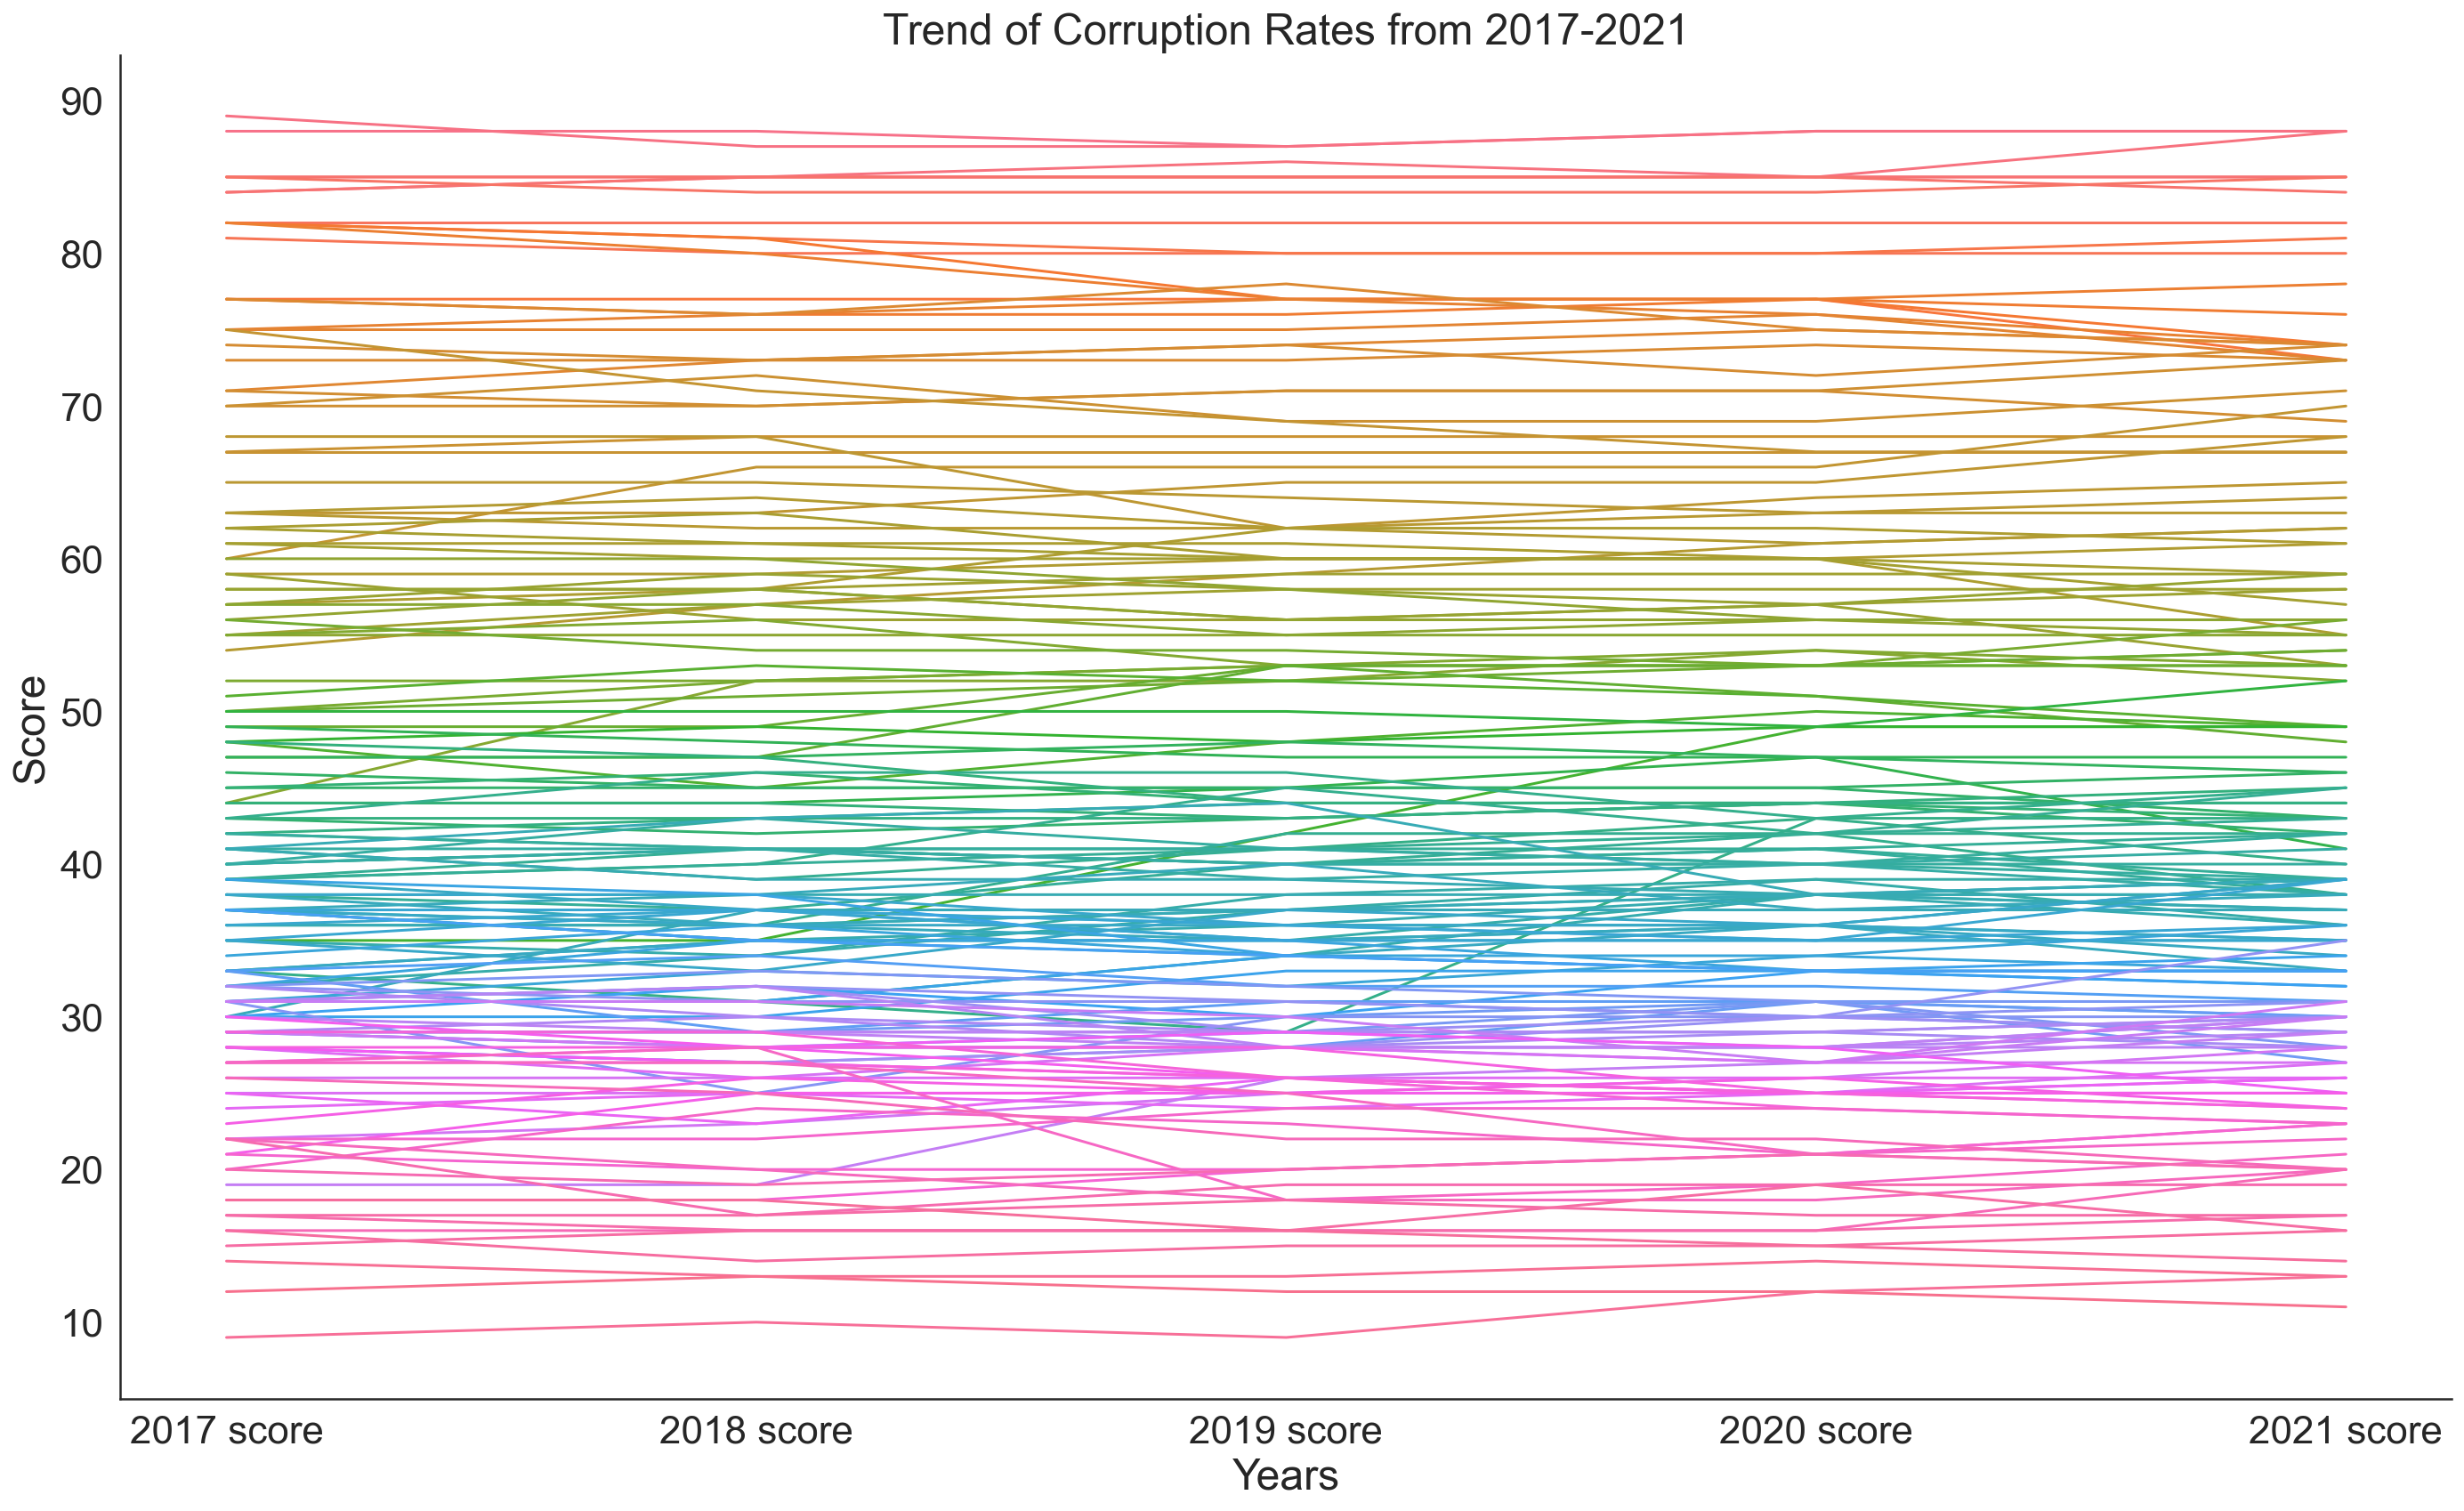

In [24]:
# new dataframe that merges the scores of each year for the bottom 10 nations
cpi_tbl_melted = pd.melt(cpi_tbl, id_vars=['location'], value_vars=['2017 score', '2018 score', 
                                                                    '2019 score', '2020 score', 
                                                                    '2021 score'])

# trend of corruption rates from 2017-2021 for the top ten most corrupt nations
corruption_trends = sns.relplot(x="variable", y="value", hue="location", kind="line", aspect = 4, data=cpi_tbl_melted)
corruption_trends.fig.set_figheight(15)
corruption_trends._legend.remove()
plt.xlabel('Years')
plt.ylabel('Score')
plt.title("Trend of Corruption Rates from 2017-2021")

These line plots show that, in general, a countries CPI data stays pretty consistent when looking at the data from 2017-2021. Due to the large number of countries, we had to remove the legend making this graph actually quite difficult to read. In the following data visualizations, we will try to finetune the CPI data to better understand some trends that pertaining to our original research question. 

### Corruption Rates (based on CPIs) from 2020-2021

Since we are interested particularly in the CPI data for 2020 and 2021, we want focus our data visualizations on these years. In addition, we will only be looking at the top 10 most corrupt countries and the top ten least corrupt countries during these years.

Let's first take a look at the bottom ten countries from the CPI dataframe, which are the most corrupt nations.

In [25]:
# new dataframe that merges the scores of each year for the bottom 10 nations
cpi_tbl_bottom_melted = pd.melt(cpi_tbl.tail(10), id_vars=['location'], value_vars=['2020 score', '2021 score'])

Text(0.5, 1.0, 'Top Ten Most Corrupt Nations 2020-2021')

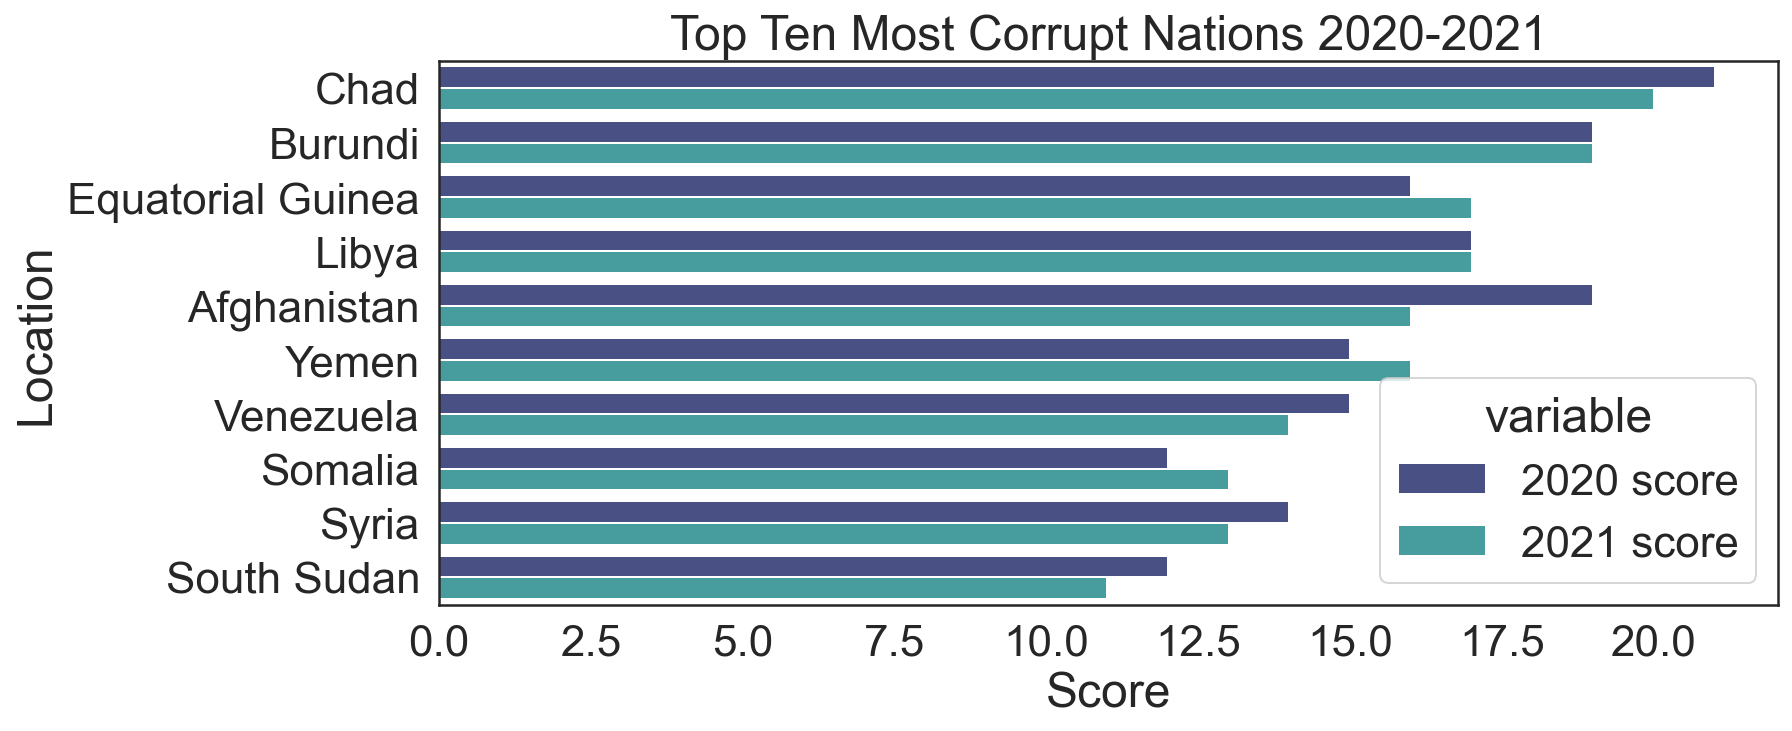

In [26]:
# plot of corruption rates from 2020-2021 for the top ten most corrupt nations
bottom_10_plot = sns.barplot(y='location', x='value', hue = 'variable', data=cpi_tbl_bottom_melted, palette = 'mako')
plt.xlabel('Score')
plt.ylabel('Location')
plt.title("Top Ten Most Corrupt Nations 2020-2021")

Because the previous plot shows the data for all the countries included in the dataset, this graph narrows the range down by only looking at the top ten most corrupt nations in the years 2020 to 2021. This barplot shows the nation/territory as the x-variable and their corresponding corruption score for the two years. We can see that Chad ranks highest among the bottom ten and South Sudan ranks lowest among the bottom ten, most corrupt nations.

To better visualize the changes in corruption rate for the top ten most corrupt countries, we created a line plot for each of the ten countries.

Text(0.5, 1.0, 'Top Ten Most Corrupt Nations 2020-2021')

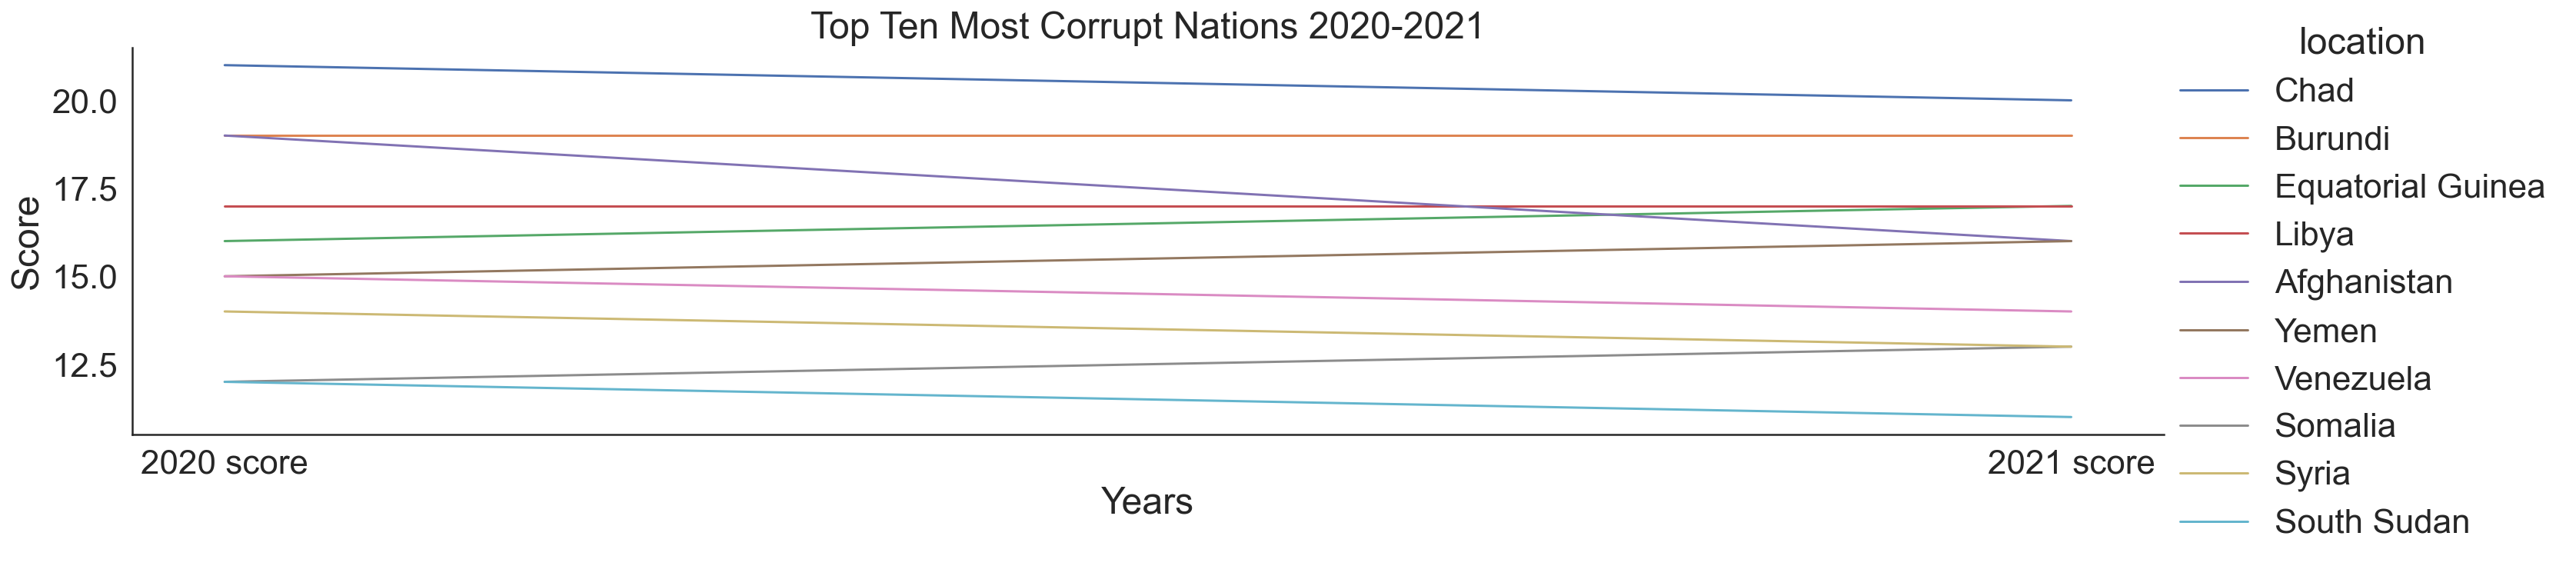

In [27]:
# trend of corruption rates from 2020-2021 for the top ten most corrupt nations
bottom_10_line = sns.relplot(x="variable", y="value", hue="location", kind="line", aspect = 4, data=cpi_tbl_bottom_melted)
plt.xlabel('Years')
plt.ylabel('Score')
plt.title("Top Ten Most Corrupt Nations 2020-2021")

After creating the line plot, we can better visualize the change in corruption rates for each of the most corrupt countries. Notably, we see that Afghanistan had the largest decrease compared to all of the other countries from 2020 to 2021, where it changed from an index of 19 to 16. Chad, Venezuela, Syria, and South Sudan also seemed to decrease in CPI scores, which could indicate that they became more corrupt between 2020 and 2021.

After looking at the top ten most corrupt nations, we can now look at the top ten least corrupts nations. 

In [28]:
# new dataframe that merges the scores of each year for the top 10 nations
cpi_tbl_top_melted = pd.melt(cpi_tbl.head(10), id_vars=['location'], value_vars=['2020 score', 
                                                                                        '2021 score'])

Text(0.5, 1.0, 'Top Ten Least Corrupt Nations 2020-2021')

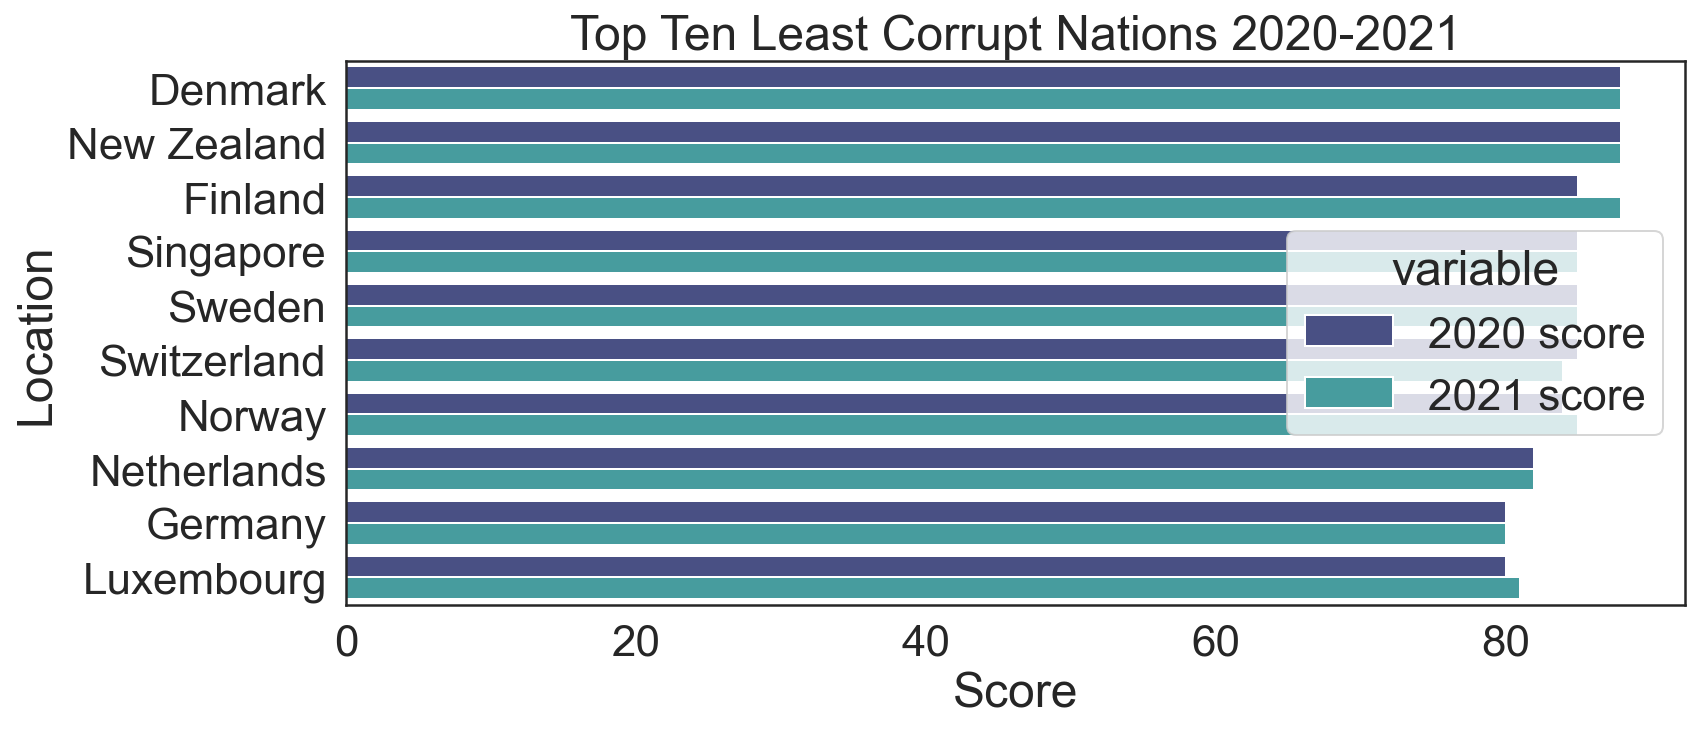

In [29]:
# plot of corruption rates from 2020-2021 for the top ten least corrupt nations
top_10_plot = sns.barplot(y='location', x='value', hue = 'variable', data=cpi_tbl_top_melted, palette = 'mako')
plt.xlabel('Score')
plt.ylabel('Location')
plt.title("Top Ten Least Corrupt Nations 2020-2021")

Overall, the scores for the top ten least corrupt nations seem to have less changes and fluctuations from 2020 to 2021 compared to the top ten most corrupt nations. The corruption indexes have stayed generally consistent from 2020 to 2021.

To better visualize the changes in corruption rate for the top ten least corrupt countries, we created a line plot for each of the ten countries.

Text(0.5, 1.0, 'Top Ten Least Corrupt Nations 2020-2021')

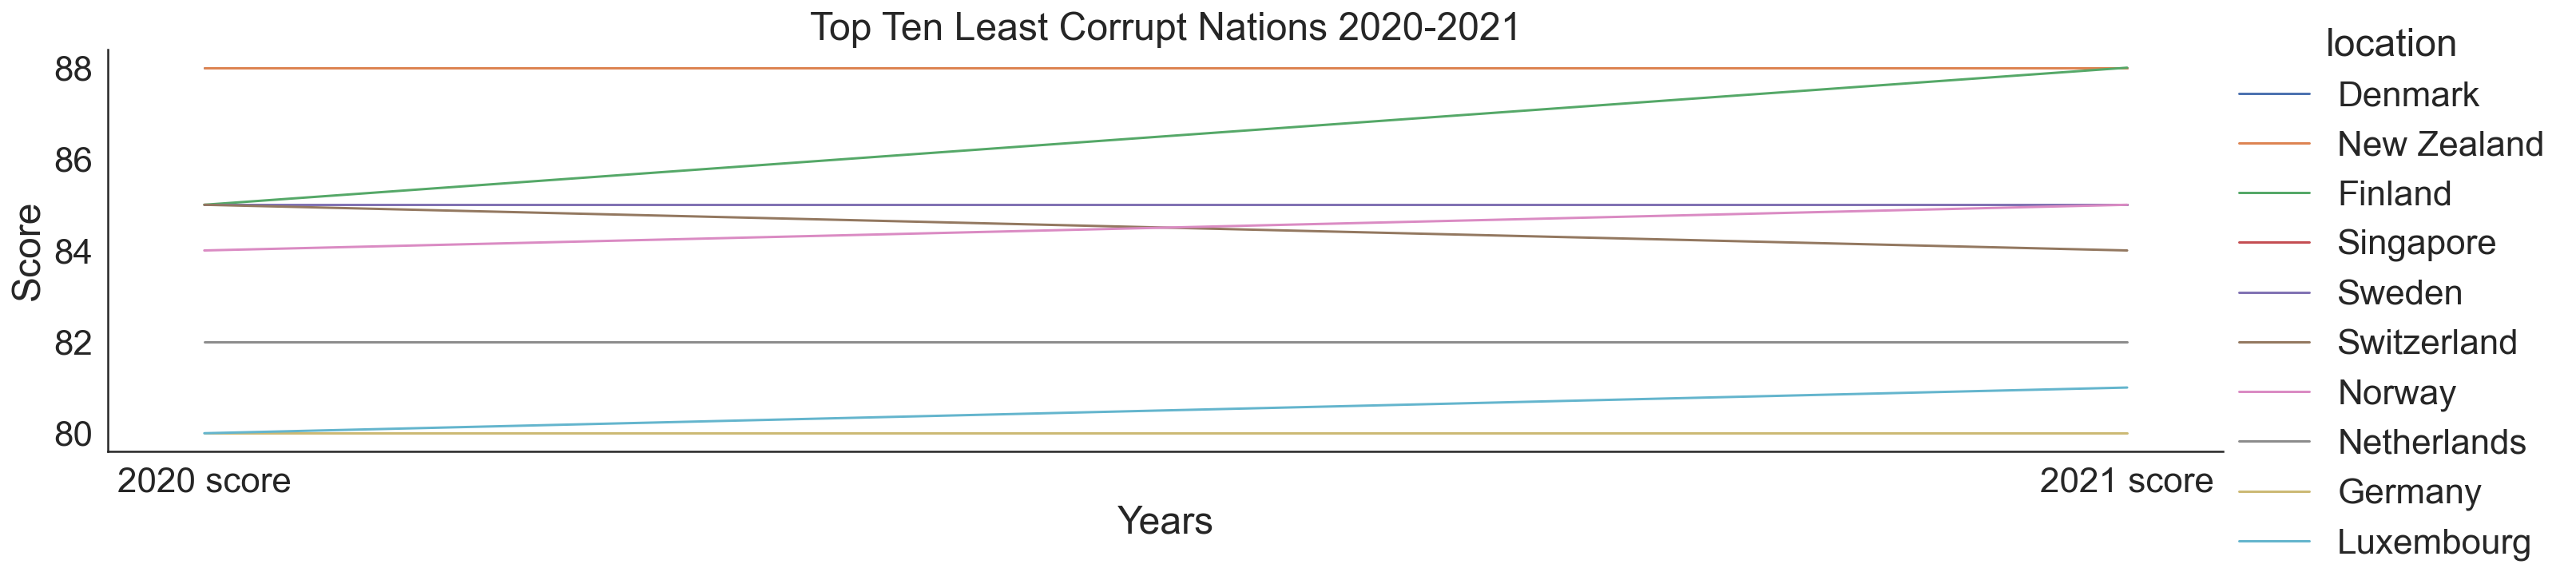

In [30]:
# trend of corruption rates from 2020-2021 for the top ten least corrupt nations
top_10_line = sns.relplot(x="variable", y="value", hue="location", kind="line", aspect = 4, data=cpi_tbl_top_melted)
plt.xlabel('Years')
plt.ylabel('Score')
plt.title("Top Ten Least Corrupt Nations 2020-2021")

We once again visualize the trends as a line graph to see the changes between the two years, 2020 and 2021. From this, we can see that Luxembourg, Norway, and Finland seem to have raised their CPI score over the two years, indicating less corruption in their countries. On the other hand, Switzerland's CPI score seems to have decreased in over the two years, indicating that they have become more corrupt as a nation.

## COVID-19 Rate of Infection from 2020 to 2021

The following table visualizes the average changes in the total number of covid cases per million from 2020 to 2021.

Text(0.5, 1.0, 'Trend of COVID-19 Infection Rates 2020-2021')

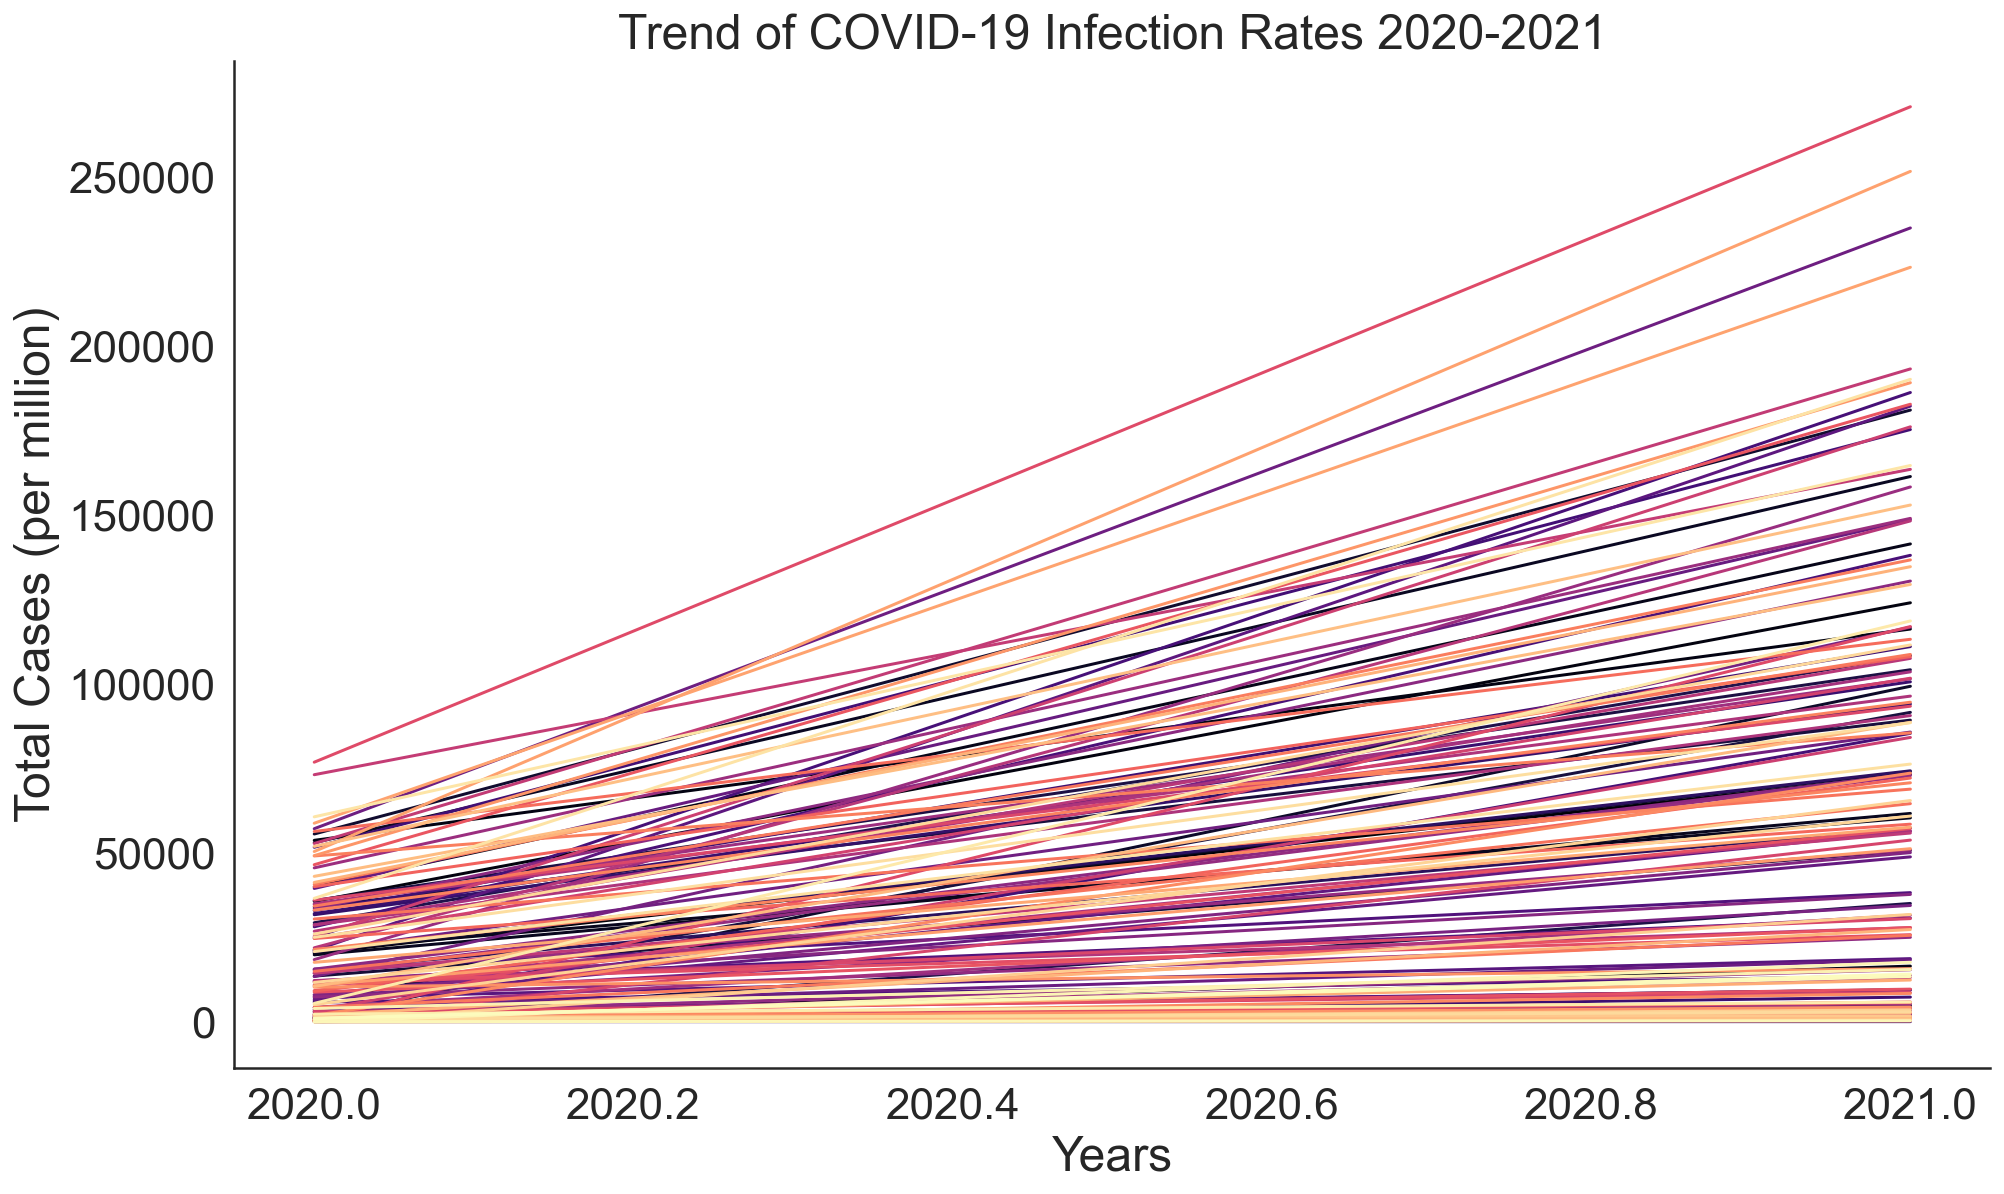

In [31]:
# trend of covid-19 infection rates from 2020 to 2021 for all countries
infection_trends = sns.relplot(data=confirmed_cases_tbl, x="date", y="total_cases_per_million", hue="location", kind="line", aspect = 3, palette = 'magma')
infection_trends.fig.set_figheight(10)
infection_trends._legend.remove()
plt.xlabel('Years')
plt.ylabel('Total Cases (per million)')
plt.title("Trend of COVID-19 Infection Rates 2020-2021")

Overall, this is a difficult graph to read, but the general trend seems to be positive as the number of covid cases increased in each country over 2020 and 2021. To better understand the trends seen here, lets break this up into separate graphs.

First it is necessary to break our original dataframe into two separate dataframes, one for COVID-19 confirmed cases in 2020 and another for COVID-19 confirmed cases in 2021, as well as sort by total cases per million.

In [32]:
# separate cases into different data frames by year
confirmed_cases_2020 = confirmed_cases_tbl[confirmed_cases_tbl['date'].isin([2020])][['location', 'total_cases_per_million']]
confirmed_cases_2021 = confirmed_cases_tbl[confirmed_cases_tbl['date'].isin([2021])][['location', 'total_cases_per_million']]

# sort the data in descending order for both confirmed cases data
confirmed_cases_2020.sort_values(by='total_cases_per_million', ascending=False, inplace=True)
confirmed_cases_2021.sort_values(by='total_cases_per_million', ascending=False, inplace=True)

With the datasets ready to go, we cana make our visualizations. The following bar graph visualizes the countries with the most infections per million in 2020. 

Text(0.5, 1.0, 'COVID-19 Infection Rates in 2020 for the Top Ten Most Infected Nations')

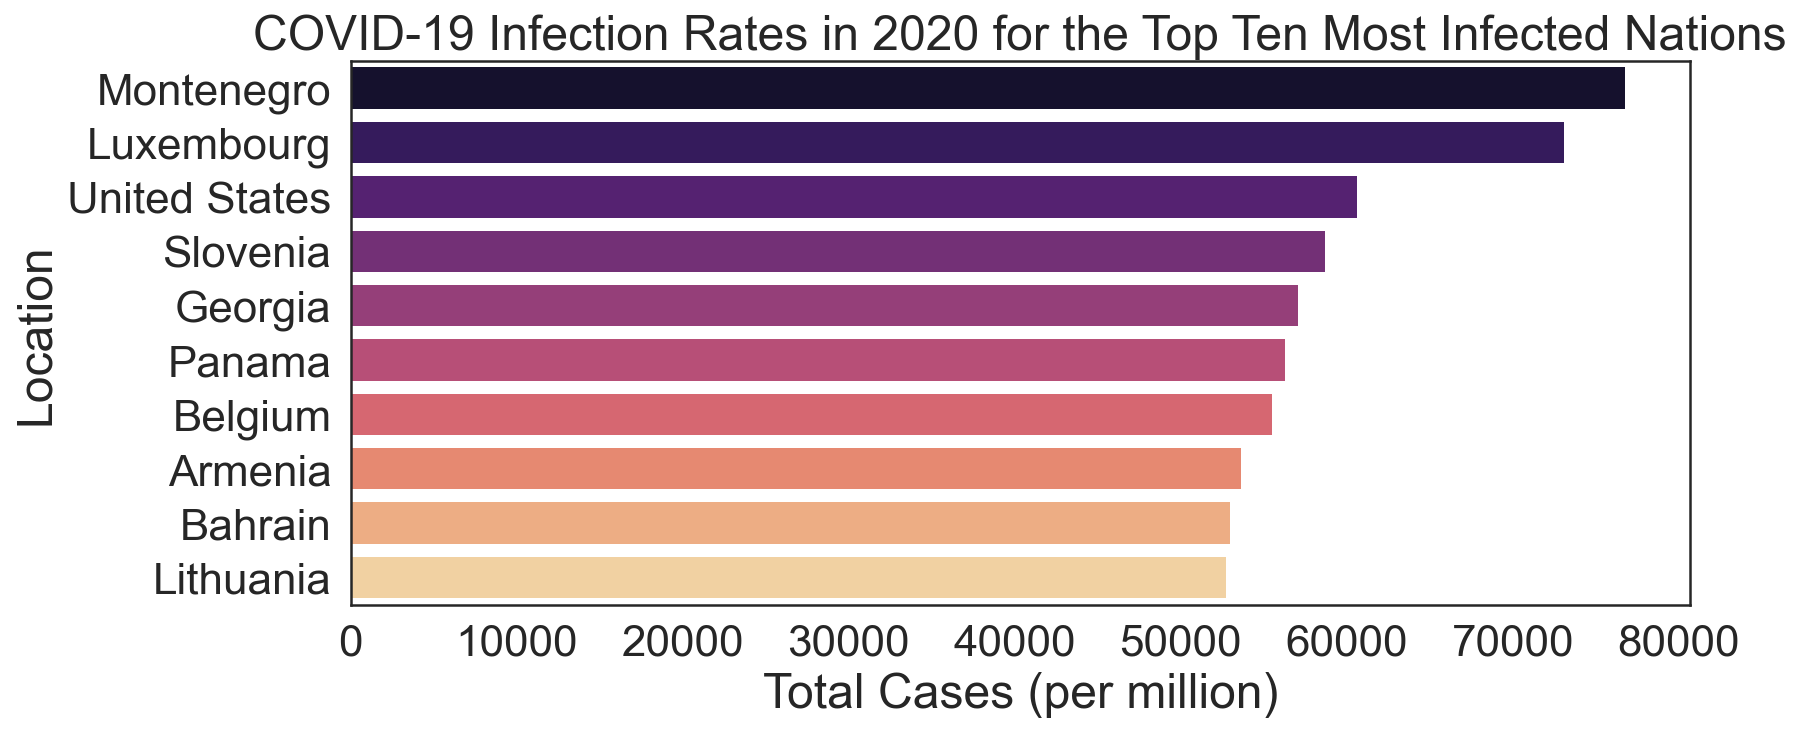

In [33]:
# countries with the highest infection rate in 2020
highest_infected_nations_2020 = confirmed_cases_2020.head(10)
sns.barplot(y='location', x='total_cases_per_million', data=highest_infected_nations_2020, palette='magma')
plt.xlabel('Total Cases (per million)')
plt.ylabel('Location')
plt.title("COVID-19 Infection Rates in 2020 for the Top Ten Most Infected Nations")

The top three most infected countries (Montenegro, Luxembourg, United States) all have higher scores (less corruption) than the last three countries: Lithuania, Bahrain and Armenia which are the lesser infection rates. However, keep in mind that there might be confounding factors that might affect the total cases per million. Countries might have not accounted all cases of covid present due to various factors such as resources.

The next bar graph visualizes the countries with the most infections per million in 2021.

Text(0.5, 1.0, 'COVID-19 Infection Rates in 2021 for the Top Ten Most Infected Nations')

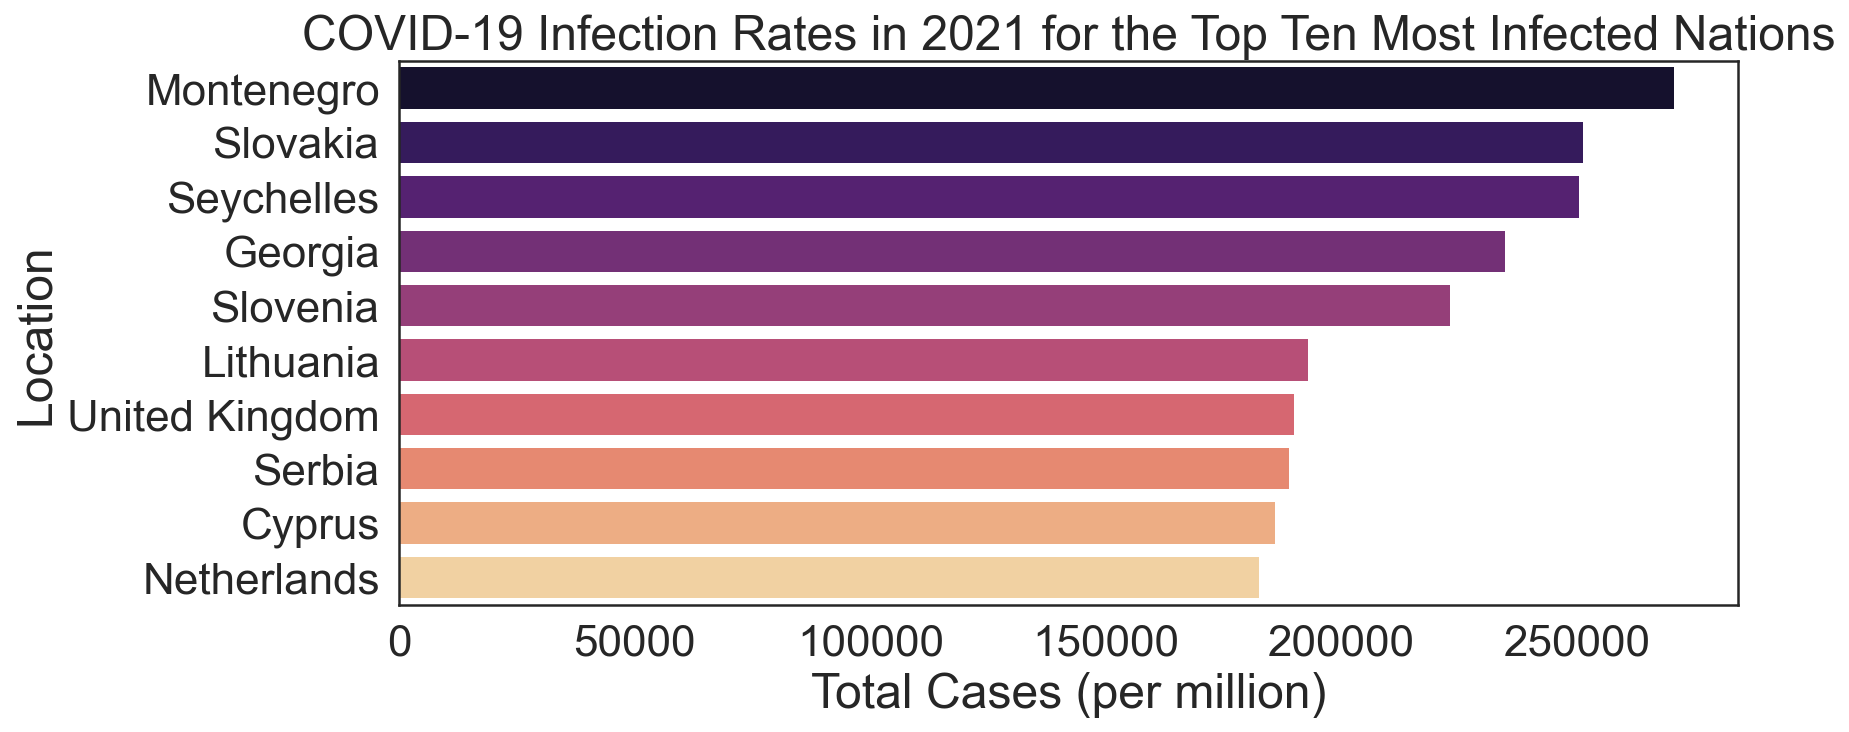

In [34]:
# countries with the highest infection rate in 2021
highest_infected_nations_2021 = confirmed_cases_2021.head(10)
sns.barplot(y='location', x='total_cases_per_million', data=highest_infected_nations_2021, palette='magma')
plt.xlabel('Total Cases (per million)')
plt.ylabel('Location')
plt.title("COVID-19 Infection Rates in 2021 for the Top Ten Most Infected Nations")

Montenegro has consistently stayed the same with the highest infections per million both years in 2020 and 2021. Georgia, Slovenia, and Lithuania have also stayed in the top ten most infected countries from 2020 to 2021. Compared to 2020, the total cases per million for the top ten most infected nations has increased from an average of 59789.0115 cases per million to 219762.8446 cases per milion, indicating a large upward trend with the number of covid cases from 2020 to 2021.

The following bar graph visualizes the countries with the least infections per million in 2020.

Text(0.5, 1.0, 'COVID-19 Infection Rates in 2020 for the Top Ten Least Infected Nations')

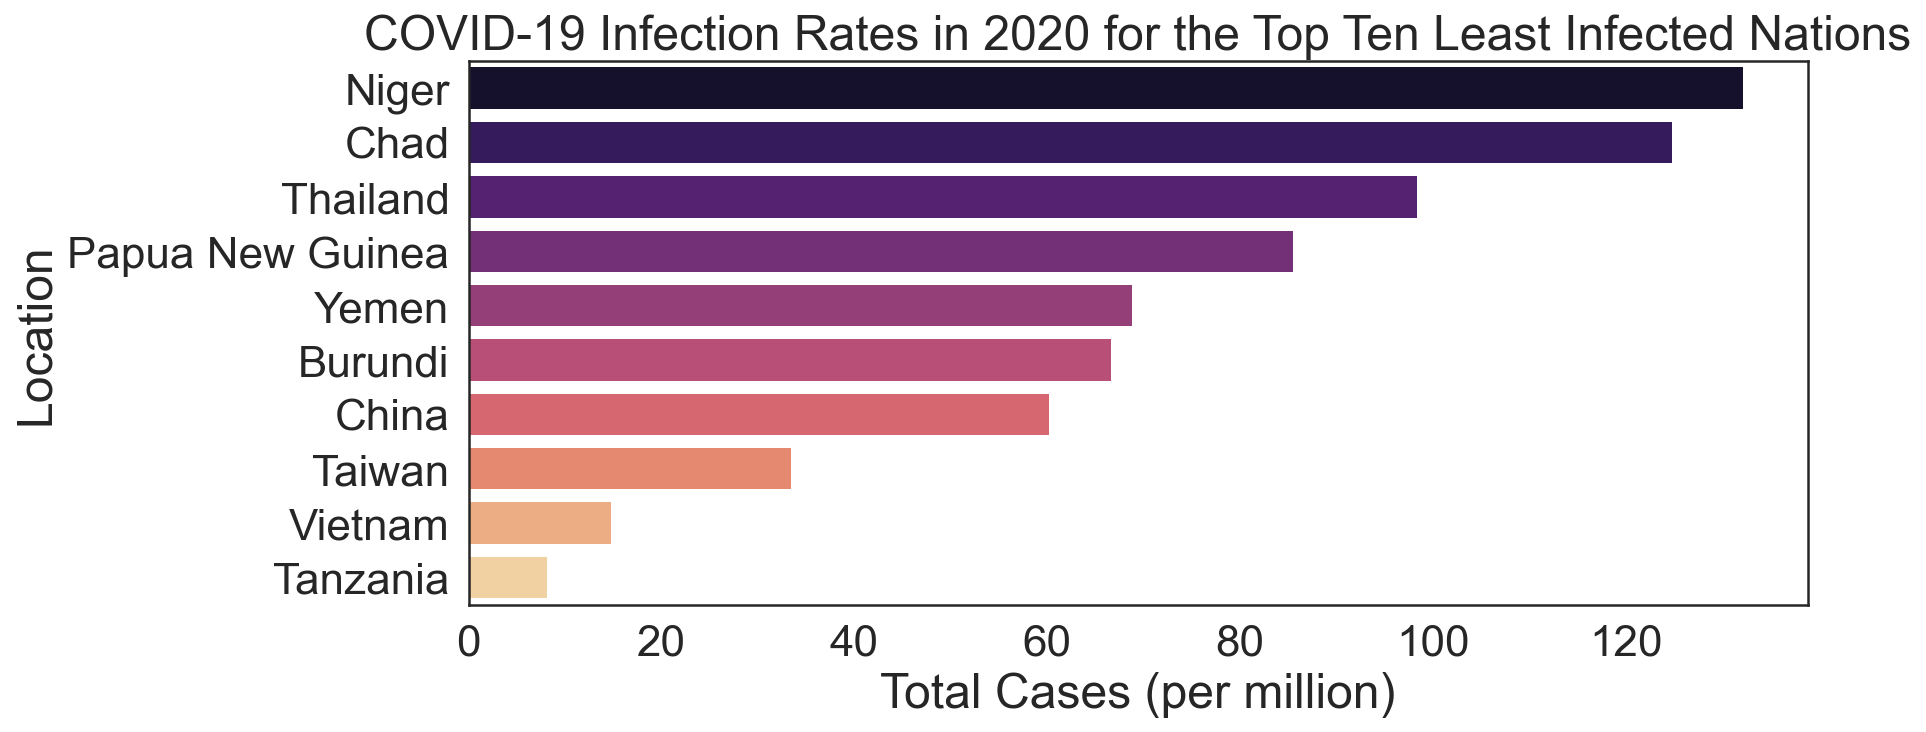

In [35]:
# countries with the lowest infection rate in 2020
least_infected_nations_2020 = confirmed_cases_2020.tail(10)
sns.barplot(y='location', x='total_cases_per_million', data=least_infected_nations_2020, palette='magma')
plt.xlabel('Total Cases (per million)')
plt.ylabel('Location')
plt.title("COVID-19 Infection Rates in 2020 for the Top Ten Least Infected Nations")

This visualisation shows the countries with the lowest cases of infections for COVID-19 per million in 2020. Of these ten countries, six fall within the lower half of the rankings with a higher percieved corruption. These countries include Niger, Chad, Thailand, Papua New Guinea, Yemen, Burundi.

This is a visualisation that shows the countries with the least infections in 2021.

Text(0.5, 1.0, 'COVID-19 Infection Rates in 2021 for the Top Ten Least Infected Nations')

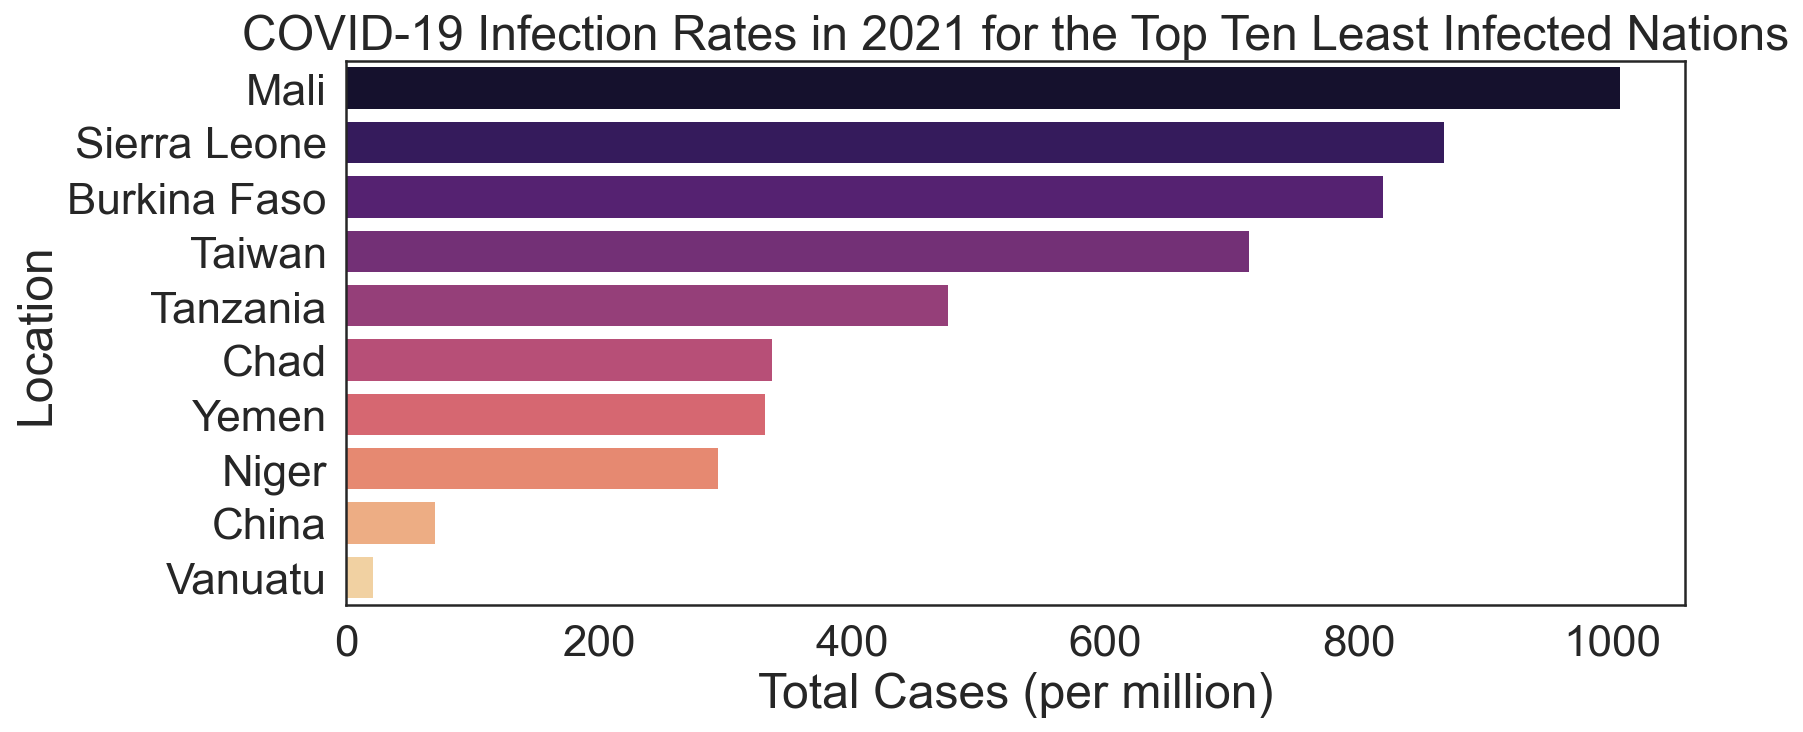

In [36]:
# countries with the lowest infection rate in 2020
least_infected_nations_2021 = confirmed_cases_2021.tail(10)
sns.barplot(y='location', x='total_cases_per_million', data=least_infected_nations_2021, palette='magma')
plt.xlabel('Total Cases (per million)')
plt.ylabel('Location')
plt.title("COVID-19 Infection Rates in 2021 for the Top Ten Least Infected Nations")

Of the countries that had the lowest infection rates in 2020, six of ten countries (China, Niger, Yemen, Chad, Tanzania, and Taiwan) maintained themselves to still be in the top ten countries with the lowest infection rates. Half of the countries (Mali, Sierra Leone, Chad, Yemen, Niger) with the lowest total cases per million fall within the lower half of the rankings for their CPI (higher corruptions). Similarly, keep in mind that confounding factors may come into play when counting the total cases per million in each country.

The next two visualizations will plot on the total cases per million and score for a particular country during a particular year. In doing so, we hope to find whether or not there is a correlation between the infection rate and CPI score. First, let's take a look at the relationship between the rate of infection and the corresponding scores during 2020 for each country. To do this, we merged the datasets.

In [37]:
# dataset combining the rate of infection in 2020 with 2020 CPI score
cases_score_2020_df = (pd.merge(confirmed_cases_2020, cpi_tbl)).sort_values(by=['location'], ascending=True)
cases_score_2020_df = cases_score_2020_df[['location', 'total_cases_per_million', '2020 score']]
cases_score_2020_df.rename(columns={"2020 score": "score"}, inplace=True)
cases_score_2020_df['total_cases_log10'] = np.log10(cases_score_2020_df['total_cases_per_million'] + 0.1)
cases_score_2020_df

,location,total_cases_per_million,score,total_cases_log10
115,Afghanistan,1313.655,19,3.118514
56,Albania,20298.413,36,4.307464
103,Algeria,2232.576,36,3.348826
137,Angola,517.275,27,2.713805
26,Argentina,35642.685,42,4.551972
...,...,...,...,...
95,Venezuela,3956.043,15,3.597272
161,Vietnam,14.923,36,1.176757
157,Yemen,68.841,15,1.838478
121,Zambia,1095.364,33,3.039598


We decided to use a log10-transformation on this data, with an offset of 0.1. This is in order to address the exponentially distributed case numbers. By reducing the magnitude of total cases, we can better assess the relationship our variables share. Therefore, we created a variable called total_cases_log10, which captures a better relationship between the two variables in our scatterplot. Additionally the following boxplot indicates that there are no outliers. However, if there were we would want to exclude them from our scatterplot.

<AxesSubplot:xlabel='total_cases_log10'>

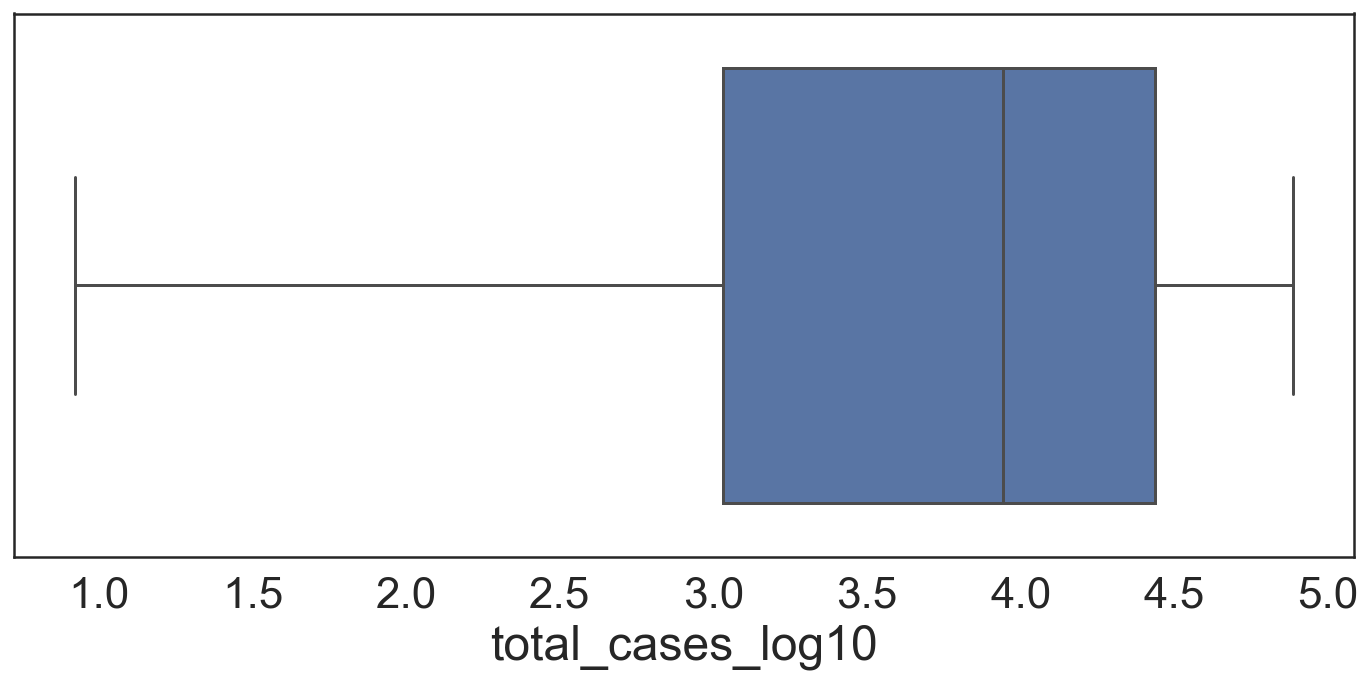

In [95]:
# to see if there are outliers
sns.boxplot(x=cases_score_2020_df['total_cases_log10'])

Text(67.295, 0.5, 'Total Cases (log10)')

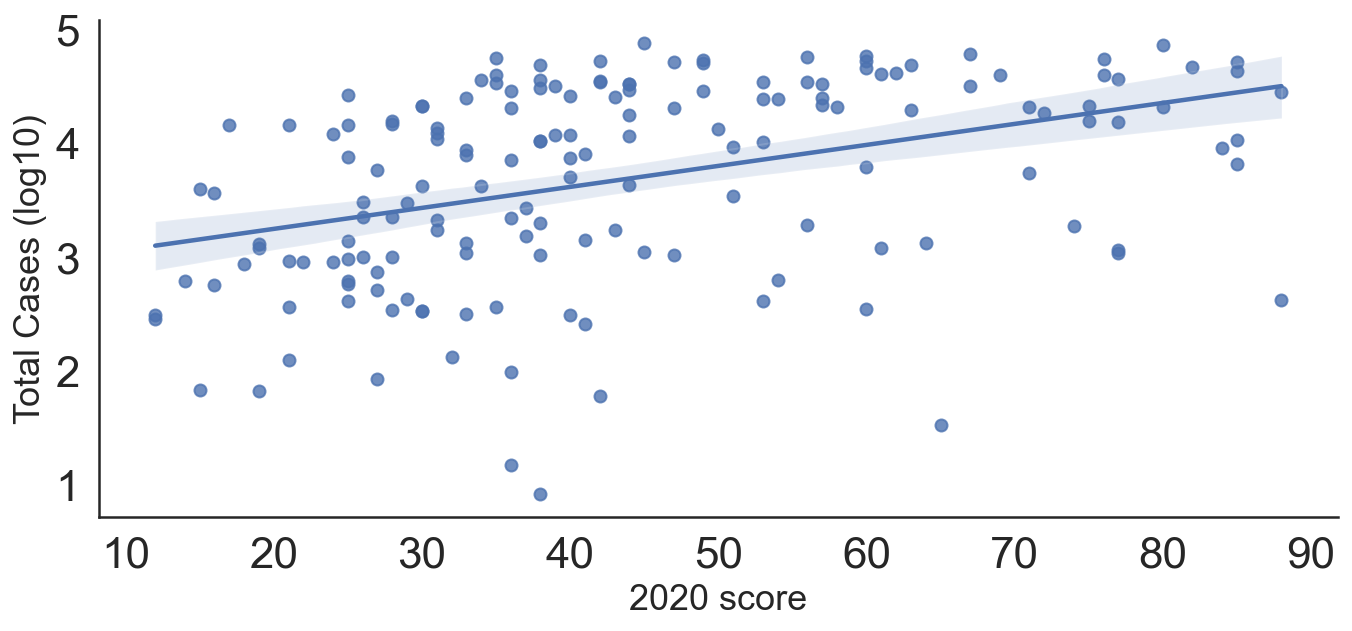

In [38]:
# scatterplot looking at the rate of infection and 2020 score
sns.lmplot(x = 'score',
           y = 'total_cases_log10',
           data = cases_score_2020_df,
           aspect = 2)
plt.xlabel('2020 score', size = 18)
plt.ylabel('Total Cases (log10)', size = 18)

After creating the above scatterplot, we can see that there seems to be a positive correlation between the 2020 CPI score and 2020 rate of infection for each country. This means that the higher the CPI Score, the higher the infection rate for the country. This is not an expected result as it doesn't follow that a less corrupt nation would have a higher infection rate. However, this is just based on the visualization. To know the statistical significance of this, it is necessary to carry out assess the results of a linear regression.

In [39]:
outcome_1, predictors_1 = patsy.dmatrices('score ~ total_cases_log10', cases_score_2020_df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     30.87
Date:                Thu, 10 Mar 2022   Prob (F-statistic):           1.12e-07
Time:                        17:13:46   Log-Likelihood:                -696.87
No. Observations:                 163   AIC:                             1398.
Df Residuals:                     161   BIC:                             1404.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            11.4632      5.95

Based on the results of our regression, our numbers indicate that there is indeed a statistically significant positive correlation between the total cases in 2020 and the corruption rates in 2020 for each country, when we compare our p-value to an alpha value of 0.1. This is definitely an unexpected result. Essentially, this shows that countries that have a high corruption index, which means they have less corrupt political societies, are actually experiencing higher COVID-19 rates. However, it is also important to note that there is a pretty low R-Squared value, indicating that there is high variability in our data. While these may not be the results we were expecting, they do showcase that the issue of corruption might have to do with factors beyond COVID-19 infection rates.

Next, let's take a look at the relationship between the rate of infection and the corresponding scores during 2020 for each country. To do this, we merged the datasets.

In [59]:
# dataset combining the rate of infection in 2021 with 2021 CPI score
cases_score_2021_df = (pd.merge(confirmed_cases_2021, cpi_tbl)).sort_values(by=['location'], ascending=True)
cases_score_2021_df = cases_score_2021_df[['location', 'total_cases_per_million', '2021 score']]
cases_score_2021_df.rename(columns={"2021 score": "score"}, inplace=True)
cases_score_2021_df['total_cases_log10'] = np.log10(cases_score_2021_df['total_cases_per_million'] + 0.1)
cases_score_2021_df

,location,total_cases_per_million,score,total_cases_log10
134,Afghanistan,3968.427,16.0,3.598629
65,Albania,73173.975,35.0,4.864357
129,Algeria,4895.753,33.0,3.689828
147,Angola,2404.489,29.0,3.381041
28,Argentina,123984.343,38.0,5.093367
...,...,...,...,...
109,Venezuela,15489.839,14.0,4.190050
106,Vietnam,17635.506,39.0,4.246390
167,Yemen,332.102,16.0,2.521402
115,Zambia,13438.963,33.0,4.128369


Again, we decided to use a log10-transformation on this data, with an offset of 0.1. This is in order to address the exponentially distributed case numbers. By reducing the magnitude of total cases, we can better assess the relationship our variables share. Therefore, we created a variable called total_cases_log10, which captures a better relationship between the two variables in our scatterplot. Additionally the following boxplot indicates that there are outliers, which we will exclude from out scatterplot as shown in the code below the boxplot.

<AxesSubplot:xlabel='total_cases_log10'>

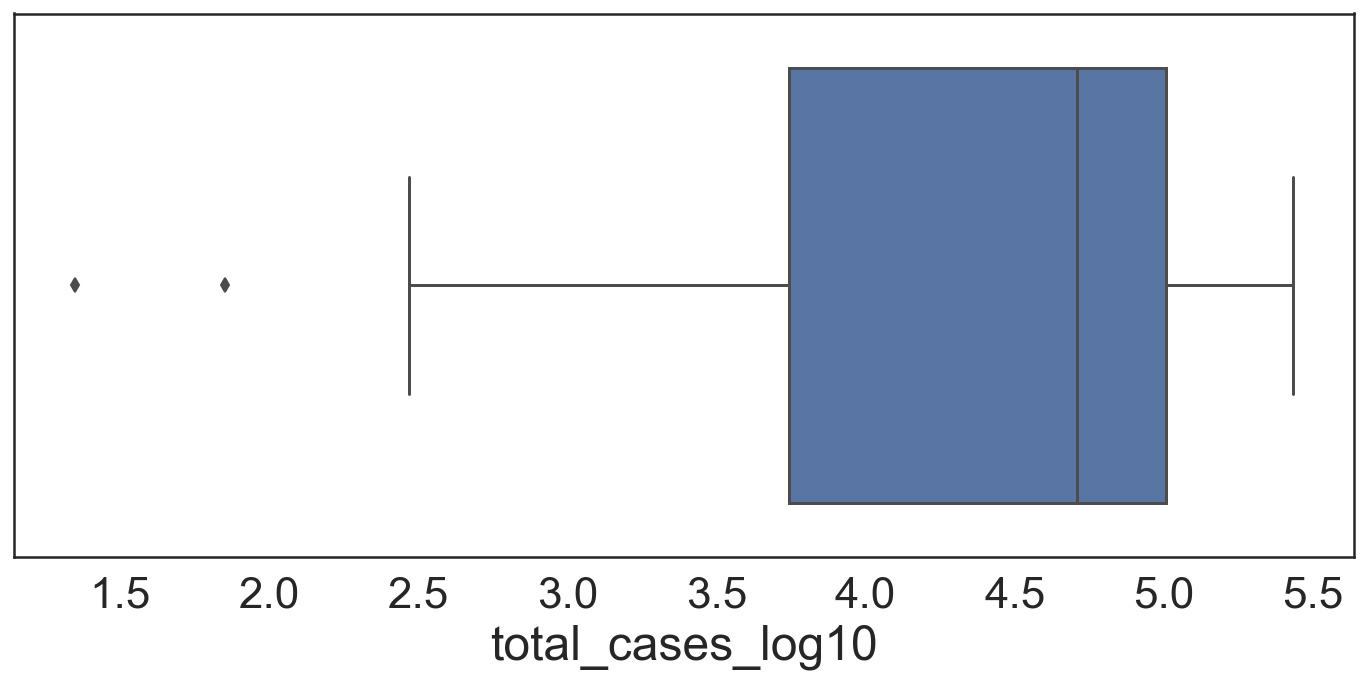

In [71]:
# to see if there are outliers
sns.boxplot(x=cases_score_2021_df['total_cases_log10'])

In [98]:
# getting rid of outliers
cases_score_2021_df2 = cases_score_2021_df[cases_score_2021_df['total_cases_log10'] > 2.1]

Text(67.295, 0.5, 'Total Cases (log10)')

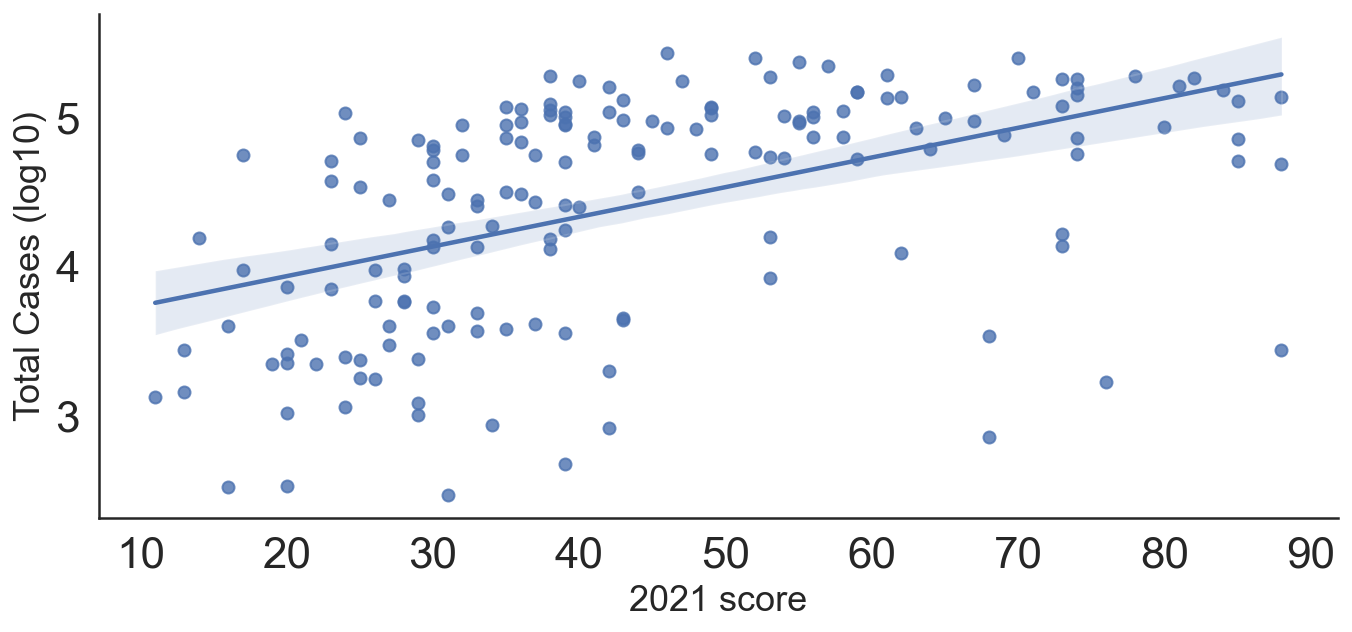

In [68]:
# scatterplot looking at the rate of infection and 2021 score
sns.lmplot(x = 'score',
           y = 'total_cases_log10',
           data = cases_score_2021_df2,
           aspect = 2)
plt.xlabel('2021 score', size = 18)
plt.ylabel('Total Cases (log10)', size = 18)

After creating the above scatterplot, we can see that there seems to be a positive correlation between the 2021 CPI score and 2021 rate of infection for each country. However, this is just based on the visualization. To know for sure it is necessary to carry out a linear regression and assess the values obtained.

In [70]:
outcome_2, predictors_2 = patsy.dmatrices('score ~ total_cases_log10', cases_score_2021_df2)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     55.78
Date:                Thu, 10 Mar 2022   Prob (F-statistic):           4.38e-12
Time:                        17:50:44   Log-Likelihood:                -708.31
No. Observations:                 168   AIC:                             1421.
Df Residuals:                     166   BIC:                             1427.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -11.9741      7.56

This result is similar to what we saw in the previous regression results. Based on the results of this regression, the numbers indicate that there is indeed a statistically significant positive correlation between the total cases in 2021 and the corruption rates in 2021 for each country, when we compare our p-value to an alpha value of 0.1. This is also an unexpected result. Essentially, this shows that countries that have a high corruption index, which means they have less corrupt political societies, are actually experiencing higher COVID-19 rates. However, it is also important to note that there is a pretty low R-Squared value, indicating that there is high variability in our data. While these may not be the results we were expecting, they do showcase, again, that the issue of corruption might have to do with factors beyond COVID-19 infection rates.

### COVID-19 Vaccination Rate for 2021

While the number of confirmed cases seems to be a good indication of corruption level for each country, there are also other factors that can play a role in a countries CPI score. Another factor we find necessary to explore is the rate of vaccination during 2021. We want to compare the available rates of vaccination for each country with the CPI scores for only 2021. The reason we are only comparing this with 2021 is because there is no vaccination data available before this year. First we combined the dataframes on vaccination rates and CPI score for 2021. Then, we created a scatterplot.

In [43]:
# dataset combining the rate of vaccination in 2021 with 2021 CPI score (no score in 2020 since there was no vaccine)
vaccine_score_2021_df = (pd.merge(total_vaccine_df, cpi_tbl)).sort_values(by=['location'], ascending=True)
vaccine_score_2021_df = vaccine_score_2021_df[['location', 'total_vaccinations_per_hundred', '2021 score']]
vaccine_score_2021_df.rename(columns={"2021 score": "score"}, inplace=True)
vaccine_score_2021_df

,location,total_vaccinations_per_hundred,score
146,Afghanistan,11.73,16.0
97,Albania,80.64,35.0
135,Algeria,28.12,33.0
130,Angola,34.23,29.0
32,Argentina,167.98,38.0
...,...,...,...
76,Venezuela,104.68,14.0
48,Vietnam,153.75,39.0
166,Yemen,1.79,16.0
153,Zambia,9.14,33.0


The following boxplot indicates that there are no outliers we need to account for when creating the scatterplot.

<AxesSubplot:xlabel='total_vaccinations_per_hundred'>

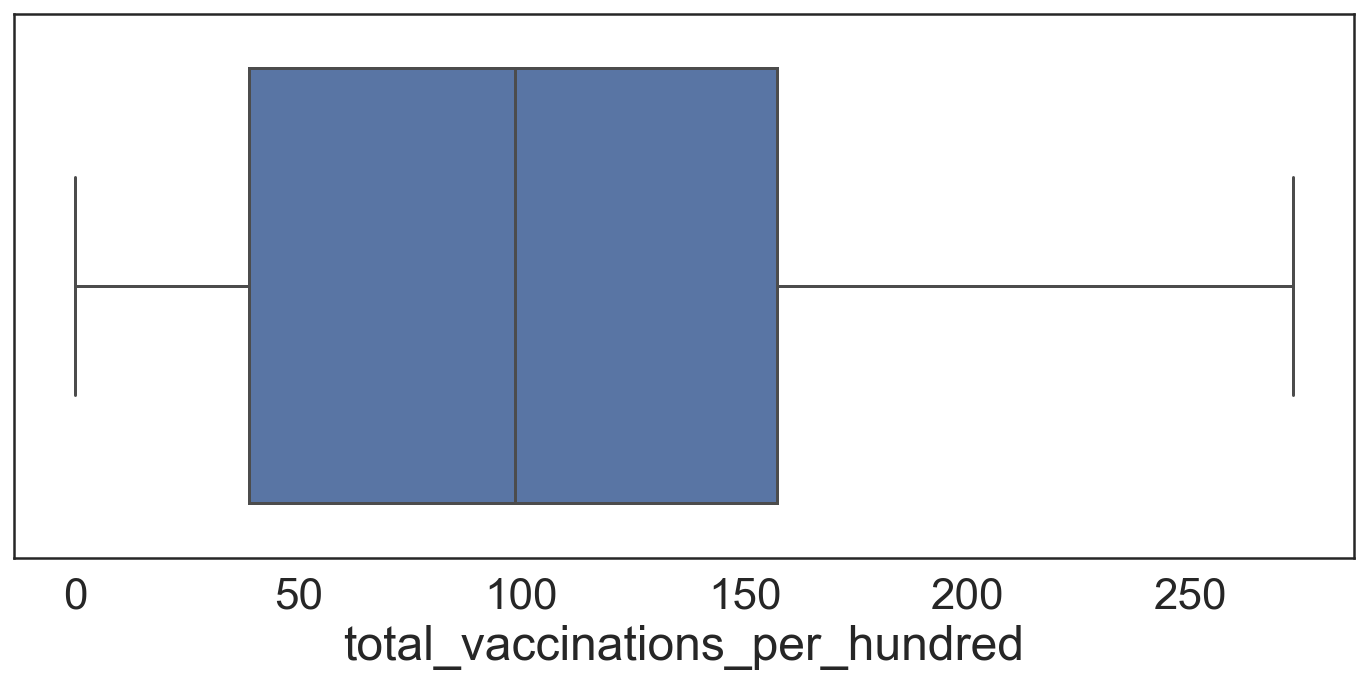

In [72]:
# to see if there are outliers
sns.boxplot(x=vaccine_score_2021_df['total_vaccinations_per_hundred'])

Text(42.795, 0.5, 'total_vaccinations_per_hundred')

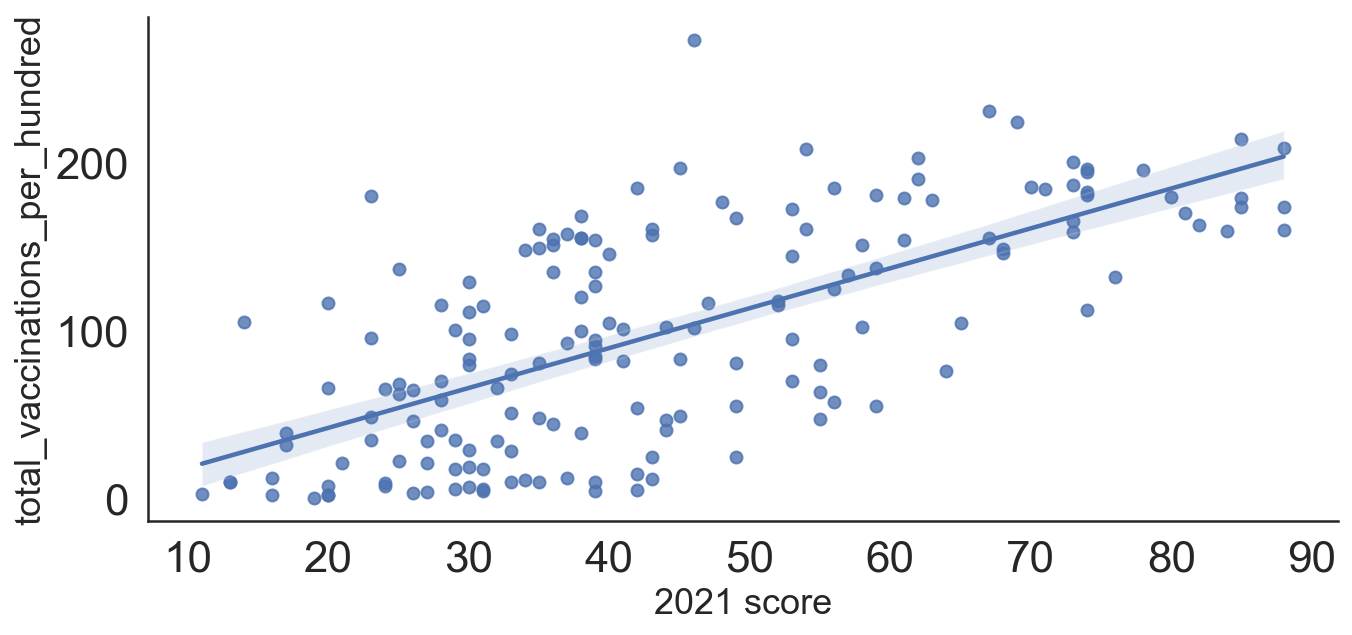

In [44]:
# scatterplot looking at the rate of vaccination and ONLY 2021 score (no score in 2020 since there was no vaccine)
sns.lmplot(x = 'score',
           y = 'total_vaccinations_per_hundred',
           data = vaccine_score_2021_df,
           aspect = 2)
plt.xlabel('2021 score', size = 18)
plt.ylabel('total_vaccinations_per_hundred', size = 18)

After creating the above scatterplot, we can see that there seems to be a positive correlation between the 2021 CPI score and 2021 rate of vaccination for each country. However, this is just based on the visualization. To know for sure it is necessary to carry out a linear regression and assess the values obtained.

In [45]:
outcome_3, predictors_3 = patsy.dmatrices('score ~ total_vaccinations_per_hundred', vaccine_score_2021_df)
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     140.4
Date:                Thu, 10 Mar 2022   Prob (F-statistic):           6.74e-24
Time:                        17:13:48   Log-Likelihood:                -684.28
No. Observations:                 169   AIC:                             1373.
Df Residuals:                     167   BIC:                             1379.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

After performing a linear regression, if we were to take a look at our p-value and compare it to an alpha value of 0.01, we find that there is a statistically significant relationship between the total COVID-19 vaccination rate and the CPI score for a country in the year 2021. In other words, there is a statistically significant positive correlation between these two variables, which could indicate that the higher a CPI score for a country (less corrupt), the better the rate of COVID-19 vaccination for that country.

### COVID-19 Other Resource Visualizations for 2020-2021

In addition to infection rates and vaccination rates, we found some other data on resource distribution during COVID-19, namely the number of handwashing facilities and the number of hospital beds, which could provide another lens into the relationship between a country's corruption level and COVID-19. To begin, we must separate our dataframe into four separate frames that we can generate plots for.

In [46]:
# separate handwashing and hospital bed data into four different dataframes by year 2020 and 2021
handwashing_facilities_2020 = resources_df[resources_df['date'].isin([2020])][['location', 'handwashing_facilities']]
handwashing_facilities_2021 = resources_df[resources_df['date'].isin([2021])][['location', 'handwashing_facilities']]

hospital_beds_2020 = resources_df[resources_df['date'].isin([2020])][['location', 'hospital_beds_per_thousand']]
hospital_beds_2021 = resources_df[resources_df['date'].isin([2021])][['location', 'hospital_beds_per_thousand']]

After separating the dataframe, we combined the dataframes on handwashing facilities in 2020 with the CPI score for 2020. Then, we create a scatterplot.

In [47]:
# dataset combining the average number of handwashing facilities in 2020 with 2020 CPI score
handwashing_facilities_score_2020_df = (pd.merge(handwashing_facilities_2020, cpi_tbl)).sort_values(by=['location'], ascending=True)
handwashing_facilities_score_2020_df = handwashing_facilities_score_2020_df[['location', 'handwashing_facilities', '2020 score']]
handwashing_facilities_score_2020_df.rename(columns={"2020 score": "score"}, inplace=True)
handwashing_facilities_score_2020_df

,location,handwashing_facilities,score
0,Afghanistan,37.746,19
1,Algeria,83.741,36
2,Armenia,94.043,49
3,Azerbaijan,83.241,30
4,Bangladesh,34.808,26
...,...,...,...
69,Uganda,21.222,27
70,Vietnam,85.847,36
71,Yemen,49.542,15
72,Zambia,13.938,33


The following boxplot indicates that there are no outliers we need to account for when creating the scatterplot.

<AxesSubplot:xlabel='handwashing_facilities'>

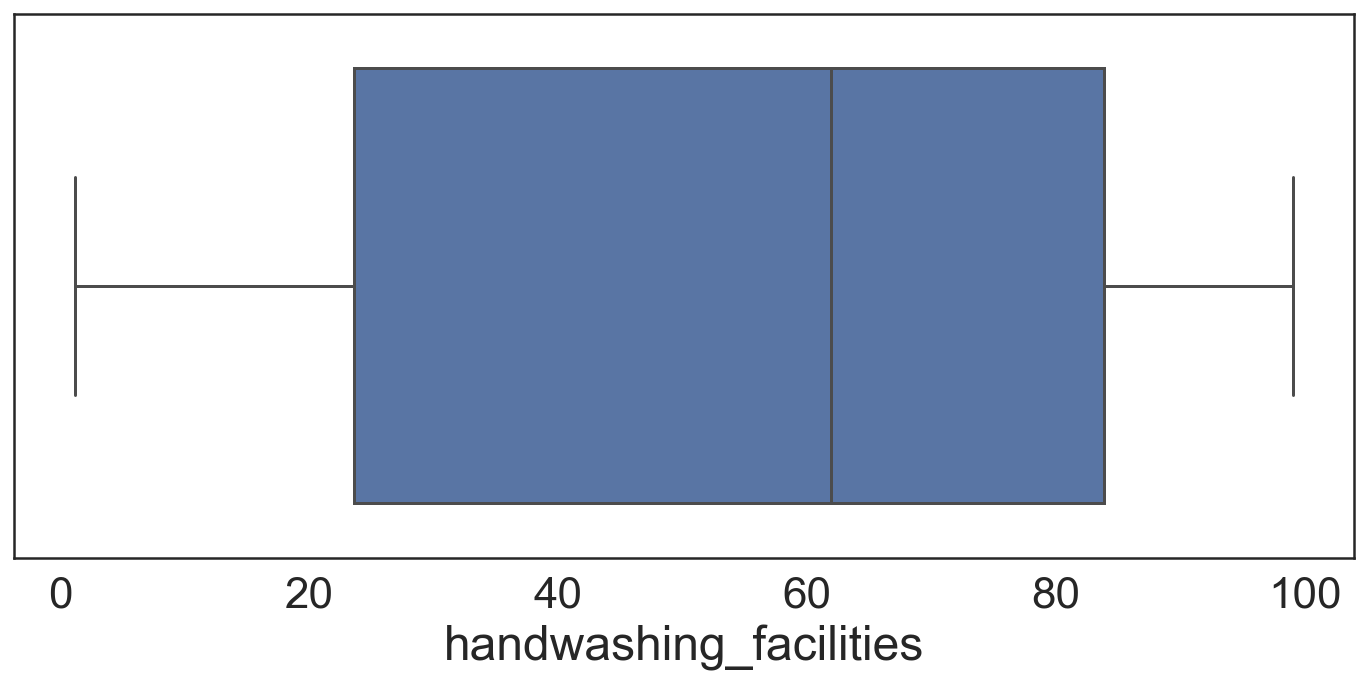

In [73]:
# to see if there are outliers
sns.boxplot(x=handwashing_facilities_score_2020_df['handwashing_facilities'])

Text(0.5, 1.0, '')

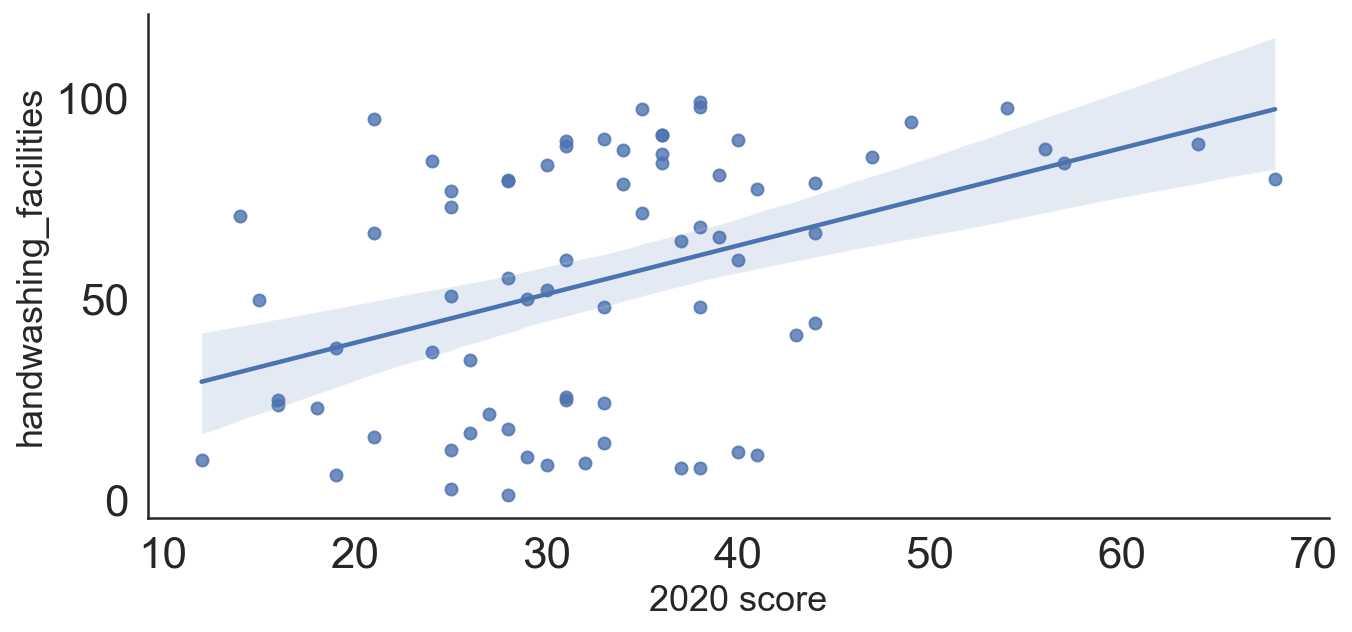

In [48]:
# scatterplot looking at the average number of handwashing facilities in 2020 and 2020 CPI score
sns.lmplot(x = 'score',
           y = 'handwashing_facilities',
           data = handwashing_facilities_score_2020_df,
           aspect = 2)
plt.xlabel('2020 score', size = 18)
plt.ylabel('handwashing_facilities', size = 18)
plt.title('')

After creating the above scatterplot, we can see that there seems to be a positive correlation between the 2020 CPI score and 2020 number of handwashing facilities for each country. However, this is just based on the visualization. To know for sure it is necessary to carry out a linear regression and assess the values obtained.

In [49]:
outcome_4, predictors_4 = patsy.dmatrices('score ~ handwashing_facilities', handwashing_facilities_score_2020_df)
mod_4 = sm.OLS(outcome_4, predictors_4)
res_4 = mod_4.fit()
print(res_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     15.44
Date:                Thu, 10 Mar 2022   Prob (F-statistic):           0.000194
Time:                        17:13:48   Log-Likelihood:                -274.49
No. Observations:                  74   AIC:                             553.0
Df Residuals:                      72   BIC:                             557.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 25

After performing a linear regression, if we were to take a look at our p-value and compare it to an alpha value of 0.01, we find that there is a statistically significant relationship between the total handwashing facilities and the CPI score for a country in the year 2020. In other words, there is a statistically significant positive correlation between these two variables, which could indicate that the higher a CPI score for a country (less corrupt), the more handwashing facilities there are available for that country's constituents.

Next, we combined the dataframes on handwashing facilities in 2021 with the CPI score for 2021. Then, we create a scatterplot.

In [50]:
# dataset combining the average number of handwashing facilities in 2021 with 2021 CPI score
handwashing_facilities_score_2021_df = (pd.merge(handwashing_facilities_2021, cpi_tbl)).sort_values(by=['location'], ascending=True)
handwashing_facilities_score_2021_df = handwashing_facilities_score_2021_df[['location', 'handwashing_facilities', '2021 score']]
handwashing_facilities_score_2021_df.rename(columns={"2021 score": "score"}, inplace=True)
handwashing_facilities_score_2021_df

,location,handwashing_facilities,score
0,Afghanistan,37.746,16.0
1,Algeria,83.741,33.0
2,Armenia,94.043,49.0
3,Azerbaijan,83.241,30.0
4,Bangladesh,34.808,26.0
...,...,...,...
69,Uganda,21.222,27.0
70,Vietnam,85.847,39.0
71,Yemen,49.542,16.0
72,Zambia,13.938,33.0


The following boxplot indicates that there are no outliers we need to account for when creating the scatterplot.

<AxesSubplot:xlabel='handwashing_facilities'>

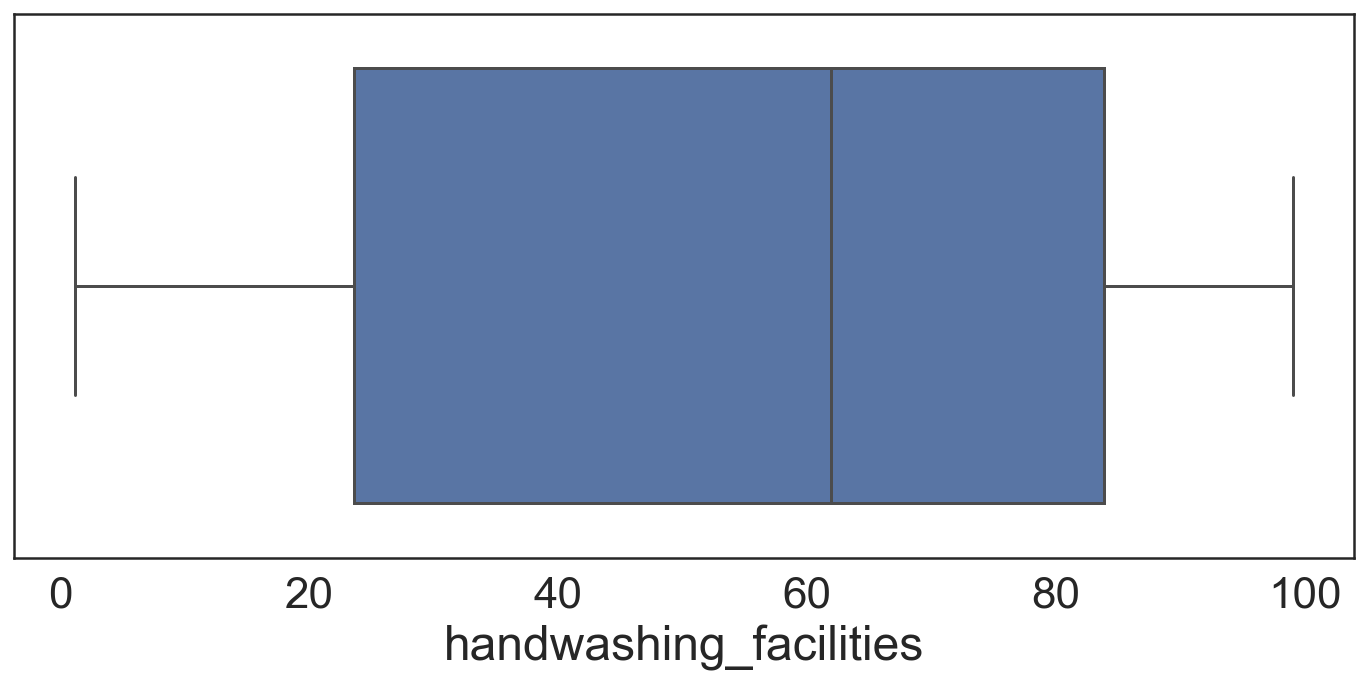

In [74]:
# to see if there are outliers
sns.boxplot(x=handwashing_facilities_score_2021_df['handwashing_facilities'])

Text(42.795, 0.5, 'handwashing_facilities')

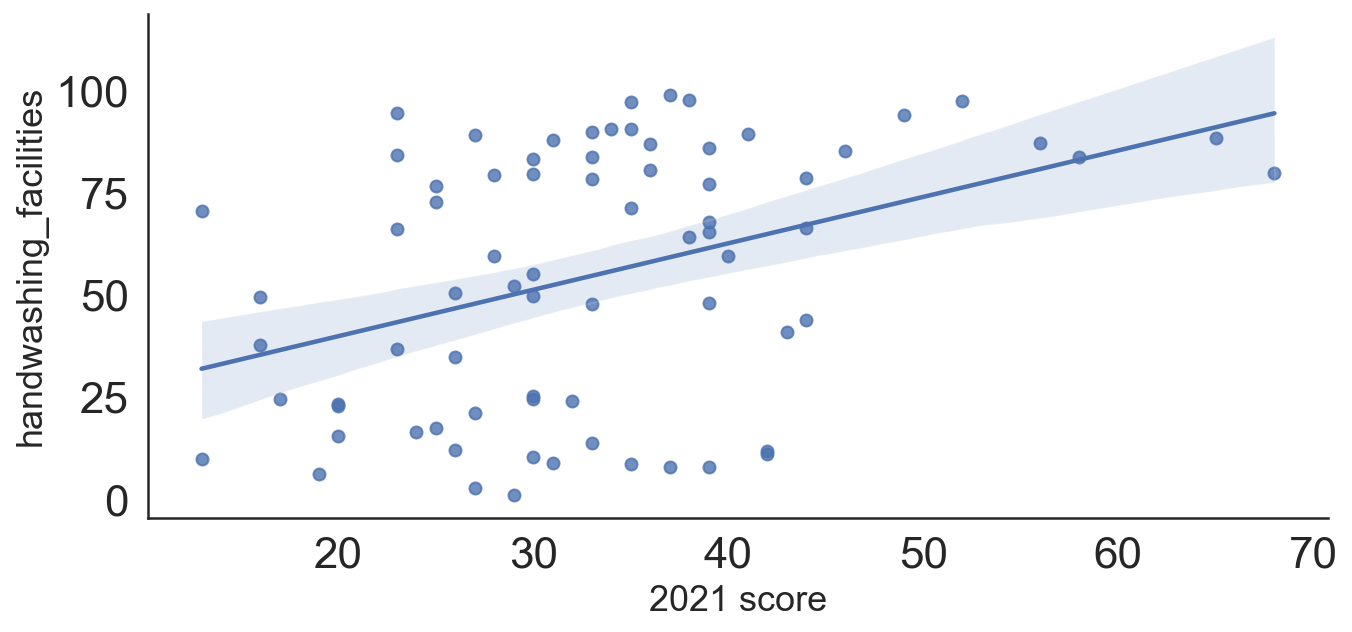

In [51]:
# scatterplot looking at the average number of handwashing facilities in 2020 and 2020 CPI score
sns.lmplot(x = 'score',
           y = 'handwashing_facilities',
           data = handwashing_facilities_score_2021_df,
           aspect = 2)
plt.xlabel('2021 score', size = 18)
plt.ylabel('handwashing_facilities', size = 18)

After creating the above scatterplot, we can see that there seems to be a positive correlation between the 2021 CPI score and 2021 number of handwashing facilities for each country. However, this is just based on the visualization. To know for sure it is necessary to carry out a linear regression and assess the values obtained.

In [52]:
outcome_5, predictors_5 = patsy.dmatrices('score ~ handwashing_facilities', handwashing_facilities_score_2021_df)
mod_5 = sm.OLS(outcome_5, predictors_5)
res_5 = mod_5.fit()
print(res_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     13.06
Date:                Thu, 10 Mar 2022   Prob (F-statistic):           0.000556
Time:                        17:13:49   Log-Likelihood:                -275.12
No. Observations:                  74   AIC:                             554.2
Df Residuals:                      72   BIC:                             558.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 25

After performing a linear regression, if we were to take a look at our p-value and compare it to an alpha value of 0.01, we find that there is a statistically significant relationship between the total handwashing facilities and the CPI score for a country in the year 2021. In other words, there is a statistically significant positive correlation between these two variables, which could indicate that the higher a CPI score for a country (less corrupt), the more handwashing facilities there are available for that country's constituents.

Now looking at the rate of available hospital beds, we combined the dataframes on hospital beds in 2020 with the CPI score for 2020. Then, we create a scatterplot.

In [53]:
# dataset combining the number of hospital beds in 2020 with 2020 CPI score
hospital_beds_score_2020_df = (pd.merge(hospital_beds_2020, cpi_tbl)).sort_values(by=['location'], ascending=True)
hospital_beds_score_2020_df = hospital_beds_score_2020_df[['location', 'hospital_beds_per_thousand', '2020 score']]
hospital_beds_score_2020_df.rename(columns={"2020 score": "score"}, inplace=True)
hospital_beds_score_2020_df

,location,hospital_beds_per_thousand,score
0,Afghanistan,0.5,19
1,Algeria,1.9,36
2,Armenia,4.2,49
3,Azerbaijan,4.7,30
4,Bangladesh,0.8,26
...,...,...,...
69,Uganda,0.5,27
70,Vietnam,2.6,36
71,Yemen,0.7,15
72,Zambia,2.0,33


The following boxplot indicates that there are outliers we need to account for when creating the scatterplot.

<AxesSubplot:xlabel='hospital_beds_per_thousand'>

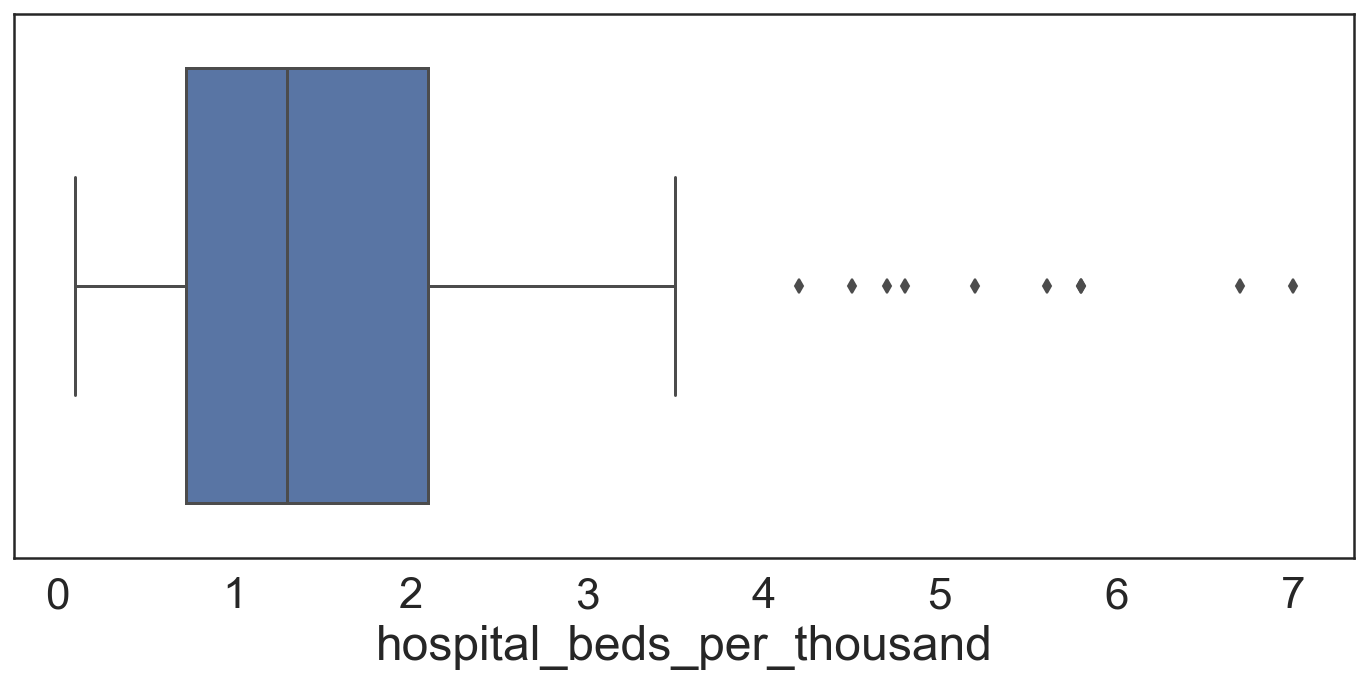

In [75]:
# to see if there are outliers
sns.boxplot(x=hospital_beds_score_2020_df['hospital_beds_per_thousand'])

In [77]:
# getting rid of outliers
hospital_beds_score_2020_df2 = hospital_beds_score_2020_df[hospital_beds_score_2020_df['hospital_beds_per_thousand'] < 4]

Text(67.295, 0.5, 'hospital_beds_per_thousand')

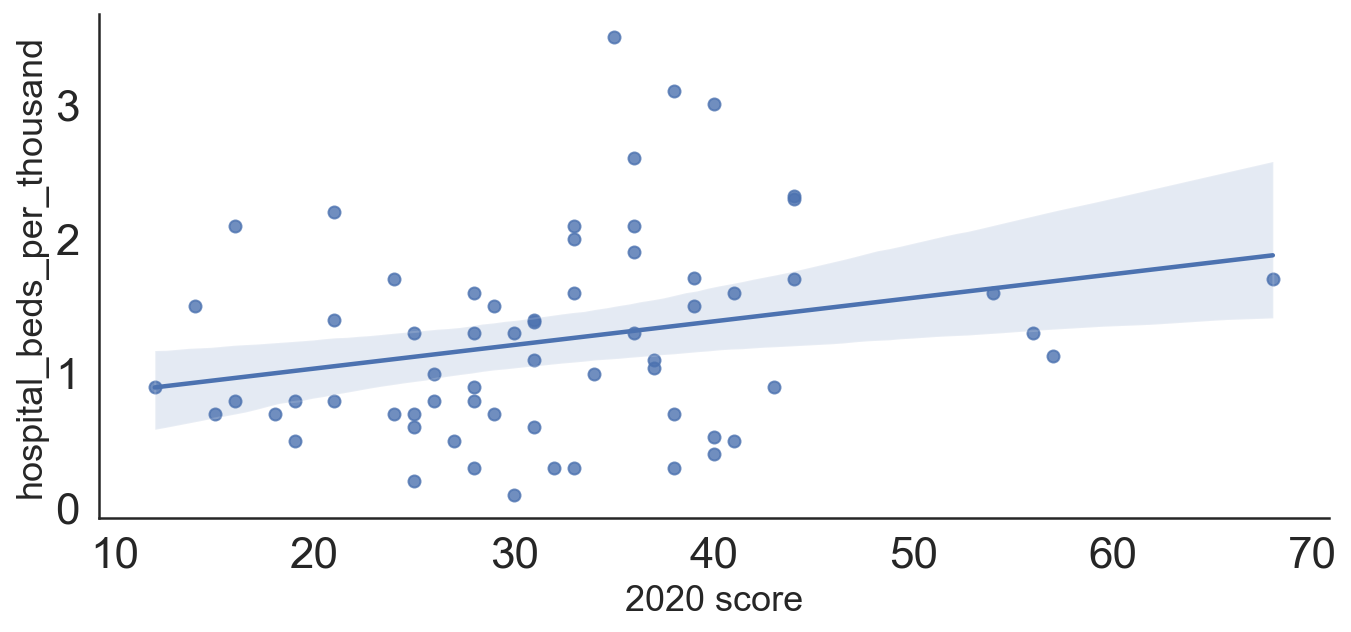

In [79]:
# scatterplot looking at the number of hospital beds in 2020 and 2020 CPI score
sns.lmplot(x = 'score',
           y = 'hospital_beds_per_thousand',
           data = hospital_beds_score_2020_df2,
           aspect = 2)
plt.xlabel('2020 score', size = 18)
plt.ylabel('hospital_beds_per_thousand', size = 18)

After creating the above scatterplot, we can see that there seems to be a positive correlation between the 2020 CPI score and 2020 rate of available hospital beds for each country. However, this is just based on the visualization. To know for sure it is necessary to carry out a linear regression and assess the values obtained.

In [80]:
outcome_6, predictors_6 = patsy.dmatrices('score ~ hospital_beds_per_thousand', hospital_beds_score_2020_df2)
mod_6 = sm.OLS(outcome_6, predictors_6)
res_6 = mod_6.fit()
print(res_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     4.238
Date:                Thu, 10 Mar 2022   Prob (F-statistic):             0.0437
Time:                        18:16:19   Log-Likelihood:                -239.73
No. Observations:                  64   AIC:                             483.5
Df Residuals:                      62   BIC:                             487.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

After performing a linear regression, if we were to take a look at our p-value and compare it to an alpha value of 0.01, we find that there is *not* a statistically significant relationship between the rate of hospital bed availability and the CPI score for a country in the year 2020. The reason for this might be because hospital beds can be used for multiple reasons, which makes it difficult for there to be a relationship directly based on the corruption level. 

Then, we combined the dataframes on hospital beds in 2021 with the CPI score for 2021. Then, we create a scatterplot.

In [56]:
# dataset combining the number of hospital beds in 2021 with 2021 CPI score
hospital_beds_score_2021_df = (pd.merge(hospital_beds_2021, cpi_tbl)).sort_values(by=['location'], ascending=True)
hospital_beds_score_2021_df = hospital_beds_score_2021_df[['location', 'hospital_beds_per_thousand', '2021 score']]
hospital_beds_score_2021_df.rename(columns={"2021 score": "score"}, inplace=True)
hospital_beds_score_2021_df

,location,hospital_beds_per_thousand,score
0,Afghanistan,0.5,16.0
1,Algeria,1.9,33.0
2,Armenia,4.2,49.0
3,Azerbaijan,4.7,30.0
4,Bangladesh,0.8,26.0
...,...,...,...
69,Uganda,0.5,27.0
70,Vietnam,2.6,39.0
71,Yemen,0.7,16.0
72,Zambia,2.0,33.0


The following boxplot indicates that there are outliers we need to account for when creating the scatterplot.

<AxesSubplot:xlabel='hospital_beds_per_thousand'>

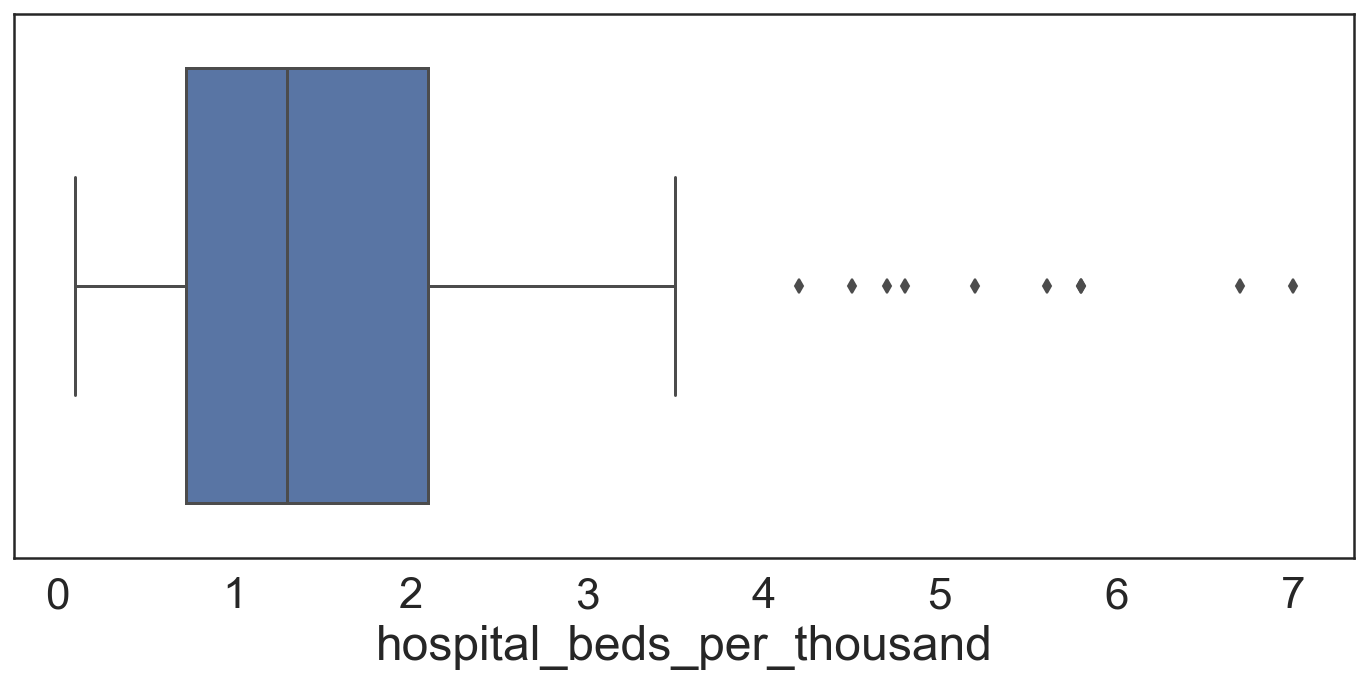

In [81]:
# to see if there are outliers
sns.boxplot(x=hospital_beds_score_2021_df['hospital_beds_per_thousand'])

In [82]:
# getting rid of outliers
hospital_beds_score_2021_df2 = hospital_beds_score_2021_df[hospital_beds_score_2021_df['hospital_beds_per_thousand'] < 4]

Text(67.295, 0.5, 'hospital_beds_per_thousand')

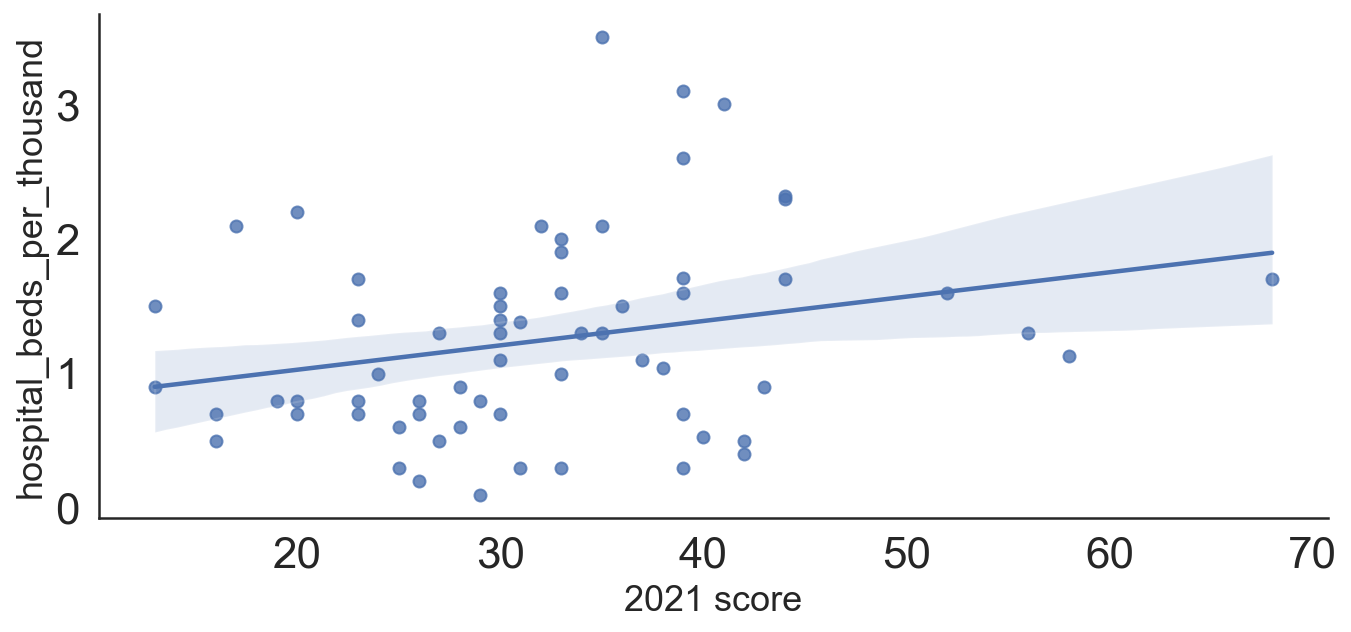

In [84]:
# scatterplot looking at the number of hospital beds in 2021 and 2021 CPI score
sns.lmplot(x = 'score',
           y = 'hospital_beds_per_thousand',
           data = hospital_beds_score_2021_df2,
           aspect = 2)
plt.xlabel('2021 score', size = 18)
plt.ylabel('hospital_beds_per_thousand', size = 18)

After creating the above scatterplot, we can see that there seems to be a positive correlation between the 2021 CPI score and 2021 rate of available hospital beds for each country. However, this is just based on the visualization. To know for sure it is necessary to carry out a linear regression and assess the values obtained.

In [85]:
outcome_7, predictors_7 = patsy.dmatrices('score ~ hospital_beds_per_thousand', hospital_beds_score_2021_df2)
mod_7 = sm.OLS(outcome_7, predictors_7)
res_7 = mod_7.fit()
print(res_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     4.446
Date:                Thu, 10 Mar 2022   Prob (F-statistic):             0.0390
Time:                        18:20:31   Log-Likelihood:                -238.96
No. Observations:                  64   AIC:                             481.9
Df Residuals:                      62   BIC:                             486.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

After performing a linear regression, if we were to take a look at our p-value and compare it to an alpha value of 0.01, we find that there is *not* a statistically significant relationship between the rate of hospital bed availability and the CPI score for a country in the year 2021. The reason for this might be because hospital beds can be used for multiple reasons, which makes it difficult for there to be a relationship directly based on the corruption level. 

# Ethics & Privacy

In an effort to address any ethics & privacy-related issues, we believe that the data that we utilized is unbiased and private. The dataset we obtain for the infection rate of COVID-19 and CPIs are from reputable open sources, namely Our World in Data and Transparency International. Also, while the data set we got for the CPI scores was from Wikipedia, it was stated on the site that they got their information from Transparency International. Furthermore, we cross-referenced the two sites to make sure of this. Additionally, by focusing on the rate of infection and CPI for an entire country, we have ensured that any data about individual constituents within that country is left anonymous, as it serves no purpose in our analysis.

There are some limitations to analyzing the corruption level with the Corruption Perception Index (CPI). Although this is a widely-used indicator of corruption on a global scale, the CPI is limited to perceived corruption as seen by experts and businesses. As a reuslt, the citizen’s experience or perception of corruption is not taken into account. Moreover, according to Transparency International, the CPI does not include in its calculation certain forms of corruption including money laundering, tax fraud, illicit reports, incidents in the private sector, and informal markets. Despite these drawbacks, there is not widely available data on separate metrics regarding the corruption level of a country. Due to the inconsistent information regarding other metrics that measure corruption, we decided to focus on the best metric available, which is the CPI score. Nevertheless, we realize that the research we conducted in this project cannot be widely applicable as we only used a single metric.

# Conclusion & Discussion

In this report, we aimed to assess the relationship that existed between a country's corruption level, as indicated by the CPI, and COVID-19 infection rate. Not only did we assess the infection rate, but we also took into account other factors related to COVID-19 including vaccination rate and resource availibility, primarily through the number of handwashing stations and hospital beds. Prior to conducting any research, we hypothesized that there would be a negative correlation between the corruption levels of different countries and their COVID-19 infection rates. This is because a higher CPI indicates less corruption whereas lower COVID-19 case rates indicate less infection. As a result, we believed there would be an inversely proportional relationship between the two. The reason we thought this was due to the fact that so much of the spread of COVID-19 has been influenced by government policies and the way in which political systems handle this crisis. By assessing the efficacy of the government policies, we hoped to show that perhaps there would be a relationship between a country's level of corruption and their ability to deal with COVID-19. 

Despite this, our hypothesis did not hold true when we analyzed the relationship that actuall existed between a country's corruption level and the rate of infection. We found that for both 2020 and 2021, there was a positive correlation that was statistically significant between the two variables. This indicates that countries with a higher CPI score had worse infection rates, which seems to be counterintuitive to what we expected. In particular, we found that in 2020 as well as 2021 there were a number of countries, namely Switzerland, Sweden, and Denmark (within the top 10 least corrupt nations), had relatively high CPI scores but also high infection rates. Similarly, we found that there were also countries, namely Yemen and Burundi (within the top 10 most corrupt nations), who had relatively low CPI scores but also low infection rates. This discrepancy indicates that CPI scores might not be as reflective of COVID-19 rates. In other words, it is  difficult to make a conjecture on how vulnerable and unprepared each country is in response to COVID-19 solely based on infection rates. Perhaps, more corrupt countries are less reliable in providing data regarding COVID-19 rates. Simply put, the efficacy of our results might be skewed due to the misinformation provided by these countries. 

However, when comparing a country's corruption rate to COVID-19 vaccination rates, we can see that there is a statistically significant positive correlation between these variables in 2021. In comparison to infection rates, perhaps vaccination rates seem to be a better indicator of a country's particular policy regarding COVID-19. Vaccination directly relates to the government's ability to provide necessary resources to their citizens. Thus, we can see a more indicative correlation that matches our expectation for the relationship that exists between these variables. Likewise, when comparing a country's corruption rate to its availability of handwashing stations, we can see that there is, again, a statistically significant positive correlation between these variables in both 2020 and 2021. Maybe it is a similar case here that handwashing facilities are more influential on specific policy related issues, which makes this a better variable to assess with a country's corruption level. Despite obtaining results for vaccination rates and handwashing facilites that reflected our hypothesis, the same cannot be said about hospital bed availability. Notably, we did not have statistically significant positive correlation between the number of hospital beds (based on population) and a country's CPI score, for both 2020 and 2021. This might be because hospital bed availability is dependent on a number of factors that are not directly related to COVID-19.

To summarize, there is a relationship between a country's corruption level (based on the CPI) and its COVID-19 infection rate, but it is not following what we expected. In addition, there is also a relationship between corruption level and a country's vaccination rate as well as availability of handwashing facilities. This does follow our expectation. Finally, there is not a significantly positive relationship between a country's corruption level and the number of hospital beds per hundred. These patterns remain consistent between 2020 and 2021.

Ultimately, what surprised us the most was the inconsistent relationship that is shared between a country's corruption level and infection rate. We set out to find if particular countries as outliers seemed to have high CPI scores and high infection rates or low CPI scores and low infection rates, only to find that this seemed to be the relationship shared by all countries. This was definitely a unique and surprising find that makes our group question the validity of these scores and the available data that exists regarding this. Perhaps the niche relevance of the CPI score makes a difficult indicator for the effect that corruption has on COVID-19. 

Overall, our work has contributed to our understanding of international corruption levels and its impact on COVID-19. As the pandemic rages on, inquiries like this are necessary to understand its effects in a global context. It is through adversity that political systems and their efficacy in response become exposed. We acknowledge that our findings may have limitations, yet we hope that, in some capacity, our work has provided some insights.

# Team Contributions

**Rhea Bhutada:** Background, EDA, Inferential and Statistical Analysis, Ethics, Conclusion & Discussion, Video Presentation

**Reyner Santonius:** Data Cleaning, EDA, Inferential and Statistical Analysis, Conclusion & Discussion, Video Presentation

**Lauren Tran:** Datasets, EDA, Inferential Analysis, Video Presentation

**Irisa Jin:** EDA, Inferential Analysis, Video Presentation

**Anna Liu:** Data Cleaning, EDA, Video Presentation